In [ ]:
!pip install pandas
!pip install datetime
!pip install numpy
!pip install matplotlib
!pip install pandasql
!pip install seaborn
!pip install plotly
!pip install scipy
!pip install scikit-learn
!pip install Orange3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=20156bbd53a69ee20a717ee99bc338244ed3c2398fc04e2401478a0bf462ac58
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 86.9 MB

In [ ]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

%matplotlib inline

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

from mpl_toolkits.mplot3d import Axes3D

import plotly as py
import plotly.graph_objs as go
import plotly.offline as py
py.offline.init_notebook_mode()

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import math

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import Orange
from Orange.data import Domain, DiscreteVariable, ContinuousVariable
#from orangecontrib.associate.fpgrowth import *
from sklearn.metrics import pairwise_distances
from itertools import combinations
from sklearn.metrics import davies_bouldin_score

In [ ]:
import pandas as pd
cs_df = pd.read_excel("https://github.com/Venkat3103/Customer-Segmentation/raw/main/Online%20Retail%202.xlsx")
cs_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [ ]:
cs_df_copy = cs_df.copy()

In [ ]:
cs_df[cs_df['Quantity']<=0].shape[0]/cs_df.shape[0]

0.019604767590130447

In [ ]:
cs_df[(cs_df['UnitPrice']<=0)|(cs_df['Quantity']<=0)|(cs_df['CustomerID'].isnull())].shape[0]

144025

In [ ]:
cs_df[cs_df['CustomerID'].isnull()].shape[0]

135080

In [ ]:
cs_df[cs_df['Description'].isnull()].shape[0]

1454

In [ ]:
x = cs_df[~cs_df['CustomerID'].isnull()]
x[x['Description'].isnull()].shape[0]

0

In [ ]:
cs_df[(cs_df['UnitPrice']<=0)|(cs_df['Quantity']<=0)|(cs_df['CustomerID'].isnull())].shape[0]/cs_df.shape[0]

0.26577340475983974

In [ ]:
len(cs_df['InvoiceNo'].unique())

25900

In [ ]:
len(cs_df[cs_df['CustomerID'].isnull()].InvoiceNo.unique())

3710

In [ ]:
cs_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
for i in cs_df.columns:
  print(i)
  print(cs_df[str(i)].unique())

InvoiceNo
[536365 536366 536367 ... 581585 581586 581587]
StockCode
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
Description
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35  

In [ ]:
def rstr(df):
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: list(x.unique()))
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ratio = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt()
    print('Data shape:', df.shape)

    str1 = pd.concat([types, counts, distincts, nulls, missing_ratio, uniques,skewness, kurtosis], axis = 1, sort=True)
    cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ratio', 'uniques','skewness', 'kurtosis' ]
    str1.columns = cols
    dtypes = str1.types.value_counts()
    print('___________________________\nData types:\n',str1.types.value_counts())
    print('___________________________')
    return str1

details = rstr(cs_df)
display(details.sort_values(by='missing_ratio', ascending=False))

Data shape: (541909, 8)
___________________________
Data types:
 object            4
float64           2
datetime64[ns]    1
int64             1
Name: types, dtype: int64
___________________________


types  counts  distincts   nulls  missing_ratio  \
CustomerID          float64  406829       4373  135080      24.926694   
Description          object  540455       4224    1454       0.268311   
Country              object  541909         38       0       0.000000   
InvoiceDate  datetime64[ns]  541909      23260       0       0.000000   
InvoiceNo            object  541909      25900       0       0.000000   
Quantity              int64  541909        722       0       0.000000   
StockCode            object  541909       4070       0       0.000000   
UnitPrice           float64  541909       1630       0       0.000000   

                                                       uniques    skewness  \
CustomerID   [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...    0.029835   
Description  [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...         NaN   
Country      [United Kingdom, France, Australia, Netherland...         NaN   
InvoiceDate  [2010-12-01T08:26:00.000000000, 2010-12-01T08:...         NaN   
InvoiceNo    [536365, 536366, 536367, 536368, 536369, 53637...         NaN   
Quantity     [6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80...   -0.264076   
StockCode    [85123A, 71053, 84406B, 84029G, 84029E, 22752,...         NaN   
UnitPrice    [2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1...  186.506972   

                  kurtosis  
CustomerID       -1.179982  
Description            NaN  
Country                NaN  
InvoiceDate            NaN  
InvoiceNo              NaN  
Quantity     119769.160031  
StockCode              NaN  
UnitPrice     59005.719097

In [ ]:
cs_df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [ ]:
print('Check if we had negative quantity and prices at same register:',
     'No' if cs_df[(cs_df.Quantity<0) & (cs_df.UnitPrice<0)].shape[0] == 0 else 'Yes', '\n')
print('Check how many register we have where quantity is negative',
      'and prices is 0 or vice-versa:',
      cs_df[(cs_df.Quantity<=0) & (cs_df.UnitPrice<=0)].shape[0])
print('\nWhat is the customer ID of the registers above:',
      cs_df.loc[(cs_df.Quantity<=0) & (cs_df.UnitPrice<=0),
                ['CustomerID']].CustomerID.unique())
print('\n% Negative Quantity: {:3.2%}'.format(cs_df[(cs_df.Quantity<0)].shape[0]/cs_df.shape[0]))
print('\nAll register with negative quantity has Invoice start with:',
      cs_df.loc[(cs_df.Quantity<0) & ~(cs_df.CustomerID.isnull()), 'InvoiceNo'].apply(lambda x: x[0]).unique())
print('\nSee an example of negative quantity and others related records:')
display(cs_df[(cs_df.CustomerID==12472) & (cs_df.StockCode==22244)])
print('Check register with UnitPrice negative:')
display(cs_df[(cs_df.UnitPrice<0)])

Check if we had negative quantity and prices at same register: No 

Check how many register we have where quantity is negative and prices is 0 or vice-versa: 1336

What is the customer ID of the registers above: [nan]

% Negative Quantity: 1.96%

All register with negative quantity has Invoice start with: ['C']

See an example of negative quantity and others related records:


InvoiceNo StockCode                 Description  Quantity  \
1973     C536548     22244  3 HOOK HANGER MAGIC GARDEN        -4   
9438      537201     22244  3 HOOK HANGER MAGIC GARDEN        12   
121980    546843     22244  3 HOOK HANGER MAGIC GARDEN        12   

               InvoiceDate  UnitPrice  CustomerID  Country  
1973   2010-12-01 14:33:00       1.95     12472.0  Germany  
9438   2010-12-05 14:19:00       1.95     12472.0  Germany  
121980 2011-03-17 12:40:00       1.95     12472.0  Germany

Check register with UnitPrice negative:


InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [ ]:

print("Sales records with Customer ID and zero in Unit Price:",cs_df[(cs_df.UnitPrice==0)  & ~(cs_df.CustomerID.isnull())].shape[0])
cs_df[(cs_df.UnitPrice==0)  & ~(cs_df.CustomerID.isnull())]

Sales records with Customer ID and zero in Unit Price: 40


InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
285657    561916         M                               Manual         1   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
358655    568158      PADS           PADS TO MATCH ALL CUSHIONS         1   
361825    568384         M                               Manual         1   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
395529    571035         M                               Manual         1   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
436961    574252         M                               Manual         1   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
479546    577168         M                               Manual         1   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
485985    577696         M                               Manual         1   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

               InvoiceDate  UnitPrice  CustomerID         Country  
9302   2010-12-05 14:02:00        0.0     12647.0         Germany  
33576  2010-12-16 14:36:00        0.0     16560.0  United Kingdom  
40089  2010-12-21 13:45:00        0.0     14911.0            EIRE  
47068  2011-01-06 16:41:00        0.0     13081.0  United Kingdom  
47070  2011-01-06 16:41:00        0.0     13081.0  United Kingdom  
56674  2011-01-13 15:10:00        0.0     15107.0  United Kingdom  
86789  2011-02-10 13:08:00        0.0     17560.0  United Kingdom  
130188 2011-03-23 10:25:00        0.0     13239.0  United Kingdom  
139453 2011-03-30 12:45:00        0.0     13113.0  United Kingdom  
145208 2011-04-04 14:42:00        0.0     14410.0  United Kingdom  
157042 2011-04-14 18:57:00        0.0     12457.0     Switzerland  
187613 2011-05-12 15:21:00       

In [ ]:
# Remove register withou CustomerID
cs_df = cs_df[~(cs_df.CustomerID.isnull())]

# Remove negative or return transactions
cs_df = cs_df[~(cs_df.Quantity<0)]
cs_df = cs_df[cs_df.UnitPrice>0]

details = rstr(cs_df)
display(details.sort_values(by='distincts', ascending=False))

Data shape: (397884, 8)
___________________________
Data types:
 object            4
float64           2
datetime64[ns]    1
int64             1
Name: types, dtype: int64
___________________________


types  counts  distincts  nulls  missing_ratio  \
InvoiceNo            object  397884      18532      0            0.0   
InvoiceDate  datetime64[ns]  397884      17282      0            0.0   
CustomerID          float64  397884       4338      0            0.0   
Description          object  397884       3877      0            0.0   
StockCode            object  397884       3665      0            0.0   
UnitPrice           float64  397884        440      0            0.0   
Quantity              int64  397884        301      0            0.0   
Country              object  397884         37      0            0.0   

                                                       uniques    skewness  \
InvoiceNo    [536365, 536366, 536367, 536368, 536369, 53637...   -0.178524   
InvoiceDate  [2010-12-01T08:26:00.000000000, 2010-12-01T08:...         NaN   
CustomerID   [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...    0.025729   
Description  [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...         NaN   
StockCode    [85123A, 71053, 84406B, 84029G, 84029E, 22752,...         NaN   
UnitPrice    [2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1...  204.032727   
Quantity     [6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80...  409.892972   
Country      [United Kingdom, France, Australia, Netherland...         NaN   

                  kurtosis  
InvoiceNo        -1.200748  
InvoiceDate            NaN  
CustomerID       -1.180822  
Description            NaN  
StockCode              NaN  
UnitPrice     58140.396673  
Quantity     178186.243253  
Country                NaN

In [ ]:
cat_des_df = cs_df.groupby(["StockCode","Description"]).count().reset_index()
display(cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].reset_index().head())
cs_df[cs_df['StockCode'] == cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1]
      .reset_index()['index'][4]]['Description'].unique()

index  StockCode
0   23196          4
1   23236          4
2   23203          3
3  17107D          3
4   23535          3

array(['BICYCLE SAFTEY WALL ART', 'WALL ART BICYCLE SAFTEY ',
       'WALL ART BICYCLE SAFETY'], dtype=object)

In [ ]:
unique_desc = cs_df[['StockCode','Description']].groupby("StockCode").apply(pd.DataFrame.mode).reset_index(drop=True)

In [ ]:
cs_df = pd.merge(unique_desc,cs_df,on="StockCode",how="inner")

In [ ]:
cs_df.head()

StockCode                Description_x InvoiceNo  \
0     10002  INFLATABLE POLITICAL GLOBE     536370   
1     10002  INFLATABLE POLITICAL GLOBE     536382   
2     10002  INFLATABLE POLITICAL GLOBE     536863   
3     10002  INFLATABLE POLITICAL GLOBE     537047   
4     10002  INFLATABLE POLITICAL GLOBE     537227   

                 Description_y  Quantity         InvoiceDate  UnitPrice  \
0  INFLATABLE POLITICAL GLOBE         48 2010-12-01 08:45:00       0.85   
1  INFLATABLE POLITICAL GLOBE         12 2010-12-01 09:45:00       0.85   
2  INFLATABLE POLITICAL GLOBE          1 2010-12-03 11:19:00       0.85   
3  INFLATABLE POLITICAL GLOBE          1 2010-12-05 11:02:00       0.85   
4  INFLATABLE POLITICAL GLOBE         24 2010-12-06 08:42:00       0.85   

   CustomerID         Country  
0     12583.0          France  
1     16098.0  United Kingdom  
2     17967.0  United Kingdom  
3     13069.0  United Kingdom  
4     17677.0  United Kingdom

In [ ]:
cs_df.drop(columns=['Description_y'], inplace=True)

In [ ]:
cs_df.head()

StockCode                Description_x InvoiceNo  Quantity  \
0     10002  INFLATABLE POLITICAL GLOBE     536370        48   
1     10002  INFLATABLE POLITICAL GLOBE     536382        12   
2     10002  INFLATABLE POLITICAL GLOBE     536863         1   
3     10002  INFLATABLE POLITICAL GLOBE     537047         1   
4     10002  INFLATABLE POLITICAL GLOBE     537227        24   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:45:00       0.85     12583.0          France  
1 2010-12-01 09:45:00       0.85     16098.0  United Kingdom  
2 2010-12-03 11:19:00       0.85     17967.0  United Kingdom  
3 2010-12-05 11:02:00       0.85     13069.0  United Kingdom  
4 2010-12-06 08:42:00       0.85     17677.0  United Kingdom

In [ ]:
cs_df.rename(columns={'Description_x': 'Description'}, inplace=True)
cs_df.shape

(397884, 8)

In [ ]:
cs_df.InvoiceDate = pd.to_datetime(cs_df.InvoiceDate)
cs_df['Amount'] = cs_df.Quantity*cs_df.UnitPrice
cs_df.CustomerID = cs_df.CustomerID.astype('int64')
cs_df.InvoiceNo = cs_df.InvoiceNo.astype('int64')

details = rstr(cs_df)
display(details.sort_values(by='distincts', ascending=False))

Data shape: (397884, 9)
___________________________
Data types:
 object            3
int64             3
float64           2
datetime64[ns]    1
Name: types, dtype: int64
___________________________


types  counts  distincts  nulls  missing_ratio  \
InvoiceNo             int64  397884      18532      0            0.0   
InvoiceDate  datetime64[ns]  397884      17282      0            0.0   
CustomerID            int64  397884       4338      0            0.0   
StockCode            object  397884       3665      0            0.0   
Description          object  397884       3647      0            0.0   
Amount              float64  397884       2939      0            0.0   
UnitPrice           float64  397884        440      0            0.0   
Quantity              int64  397884        301      0            0.0   
Country              object  397884         37      0            0.0   

                                                       uniques    skewness  \
InvoiceNo    [536370, 536382, 536863, 537047, 537227, 53777...   -0.178524   
InvoiceDate  [2010-12-01T08:45:00.000000000, 2010-12-01T09:...         NaN   
CustomerID   [12583, 16098, 17967, 13069, 17677, 15529, 167...    0.025729   
StockCode    [10002, 10080, 10120, 10125, 10133, 10135, 110...         NaN   
Description  [INFLATABLE POLITICAL GLOBE , GROOVY CACTUS IN...         NaN   
Amount       [40.8, 10.2, 0.85, 20.4, 6.8, 8.5, 30.59999999...  451.443182   
UnitPrice    [0.85, 0.39, 0.21, 0.42, 1.25, 1.06, 2.46, 0.2...  204.032727   
Quantity     [48, 12, 1, 24, 8, 10, 36, 4, 3, 5, 60, 11, 6,...  409.892972   
Country      [France, United Kingdom, EIRE, Germany, Spain,...         NaN   

                  kurtosis  
InvoiceNo        -1.200748  
InvoiceDate            NaN  
CustomerID       -1.180822  
StockCode              NaN  
Description            NaN  
Amount       232155.117219  
UnitPrice     58140.396673  
Quantity     178186.243253  
Country                NaN

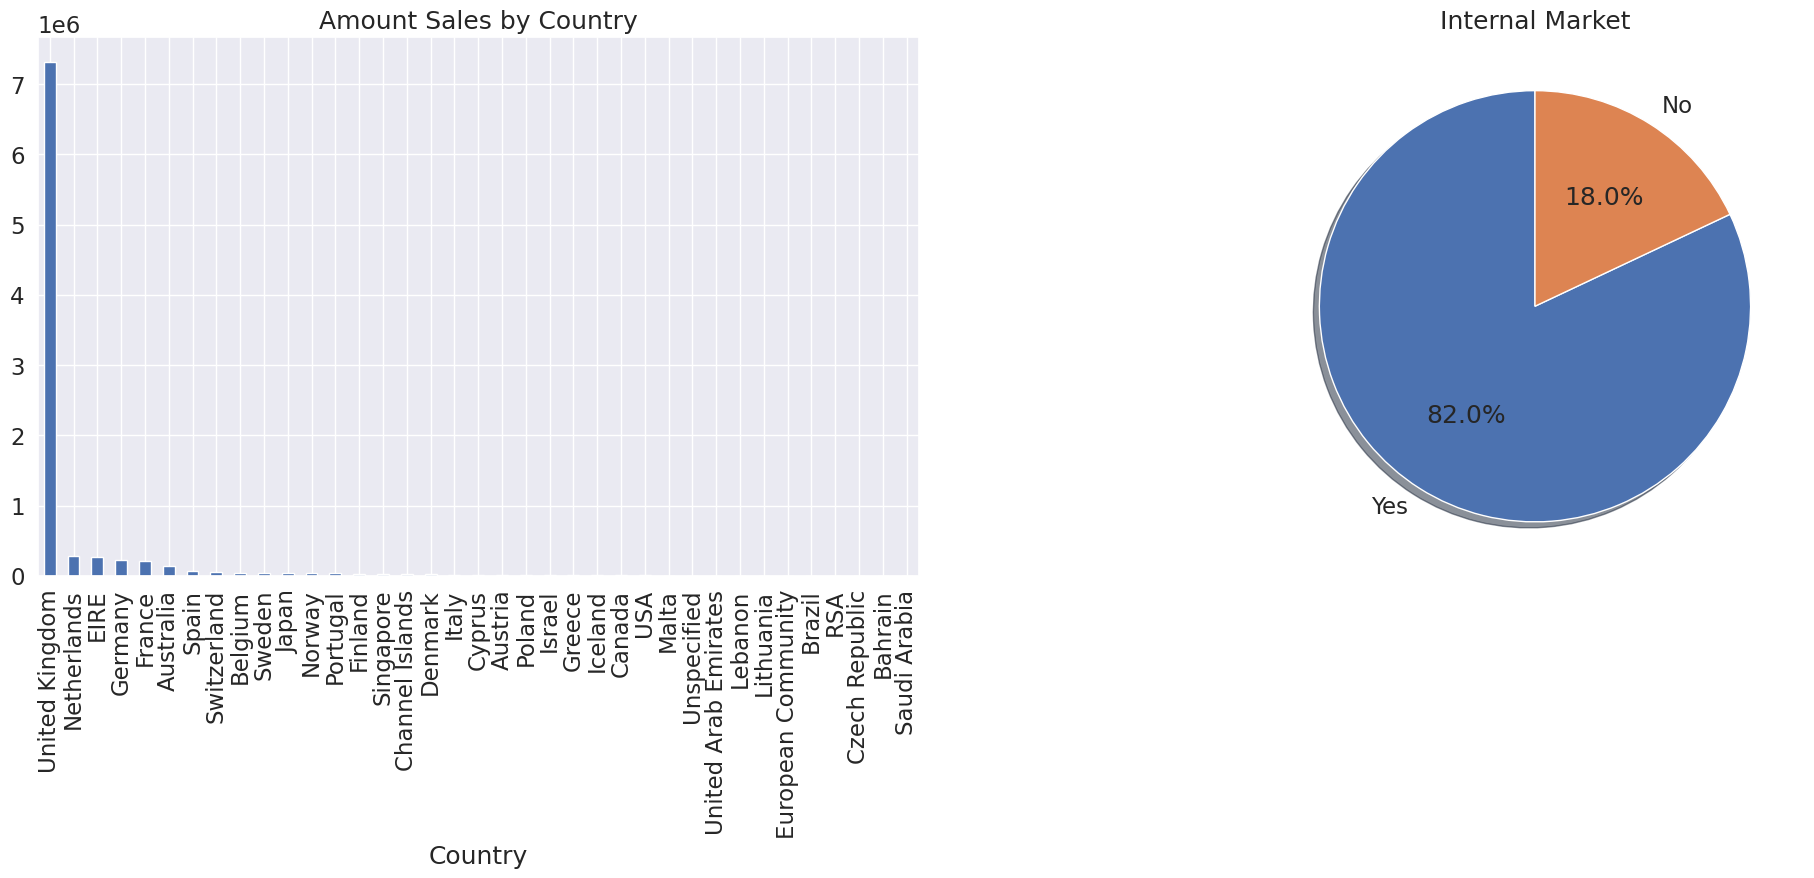

In [ ]:
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
g = cs_df.groupby(["Country"]).Amount.sum().sort_values(ascending = False).plot(kind='bar', title='Amount Sales by Country')
cs_df['Internal'] = cs_df.Country.apply(lambda x: 'Yes' if x=='United Kingdom' else 'No' )
f2 = fig.add_subplot(122)
market = cs_df.groupby(["Internal"]).Amount.sum().sort_values(ascending = False)
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Internal Market')
plt.show()

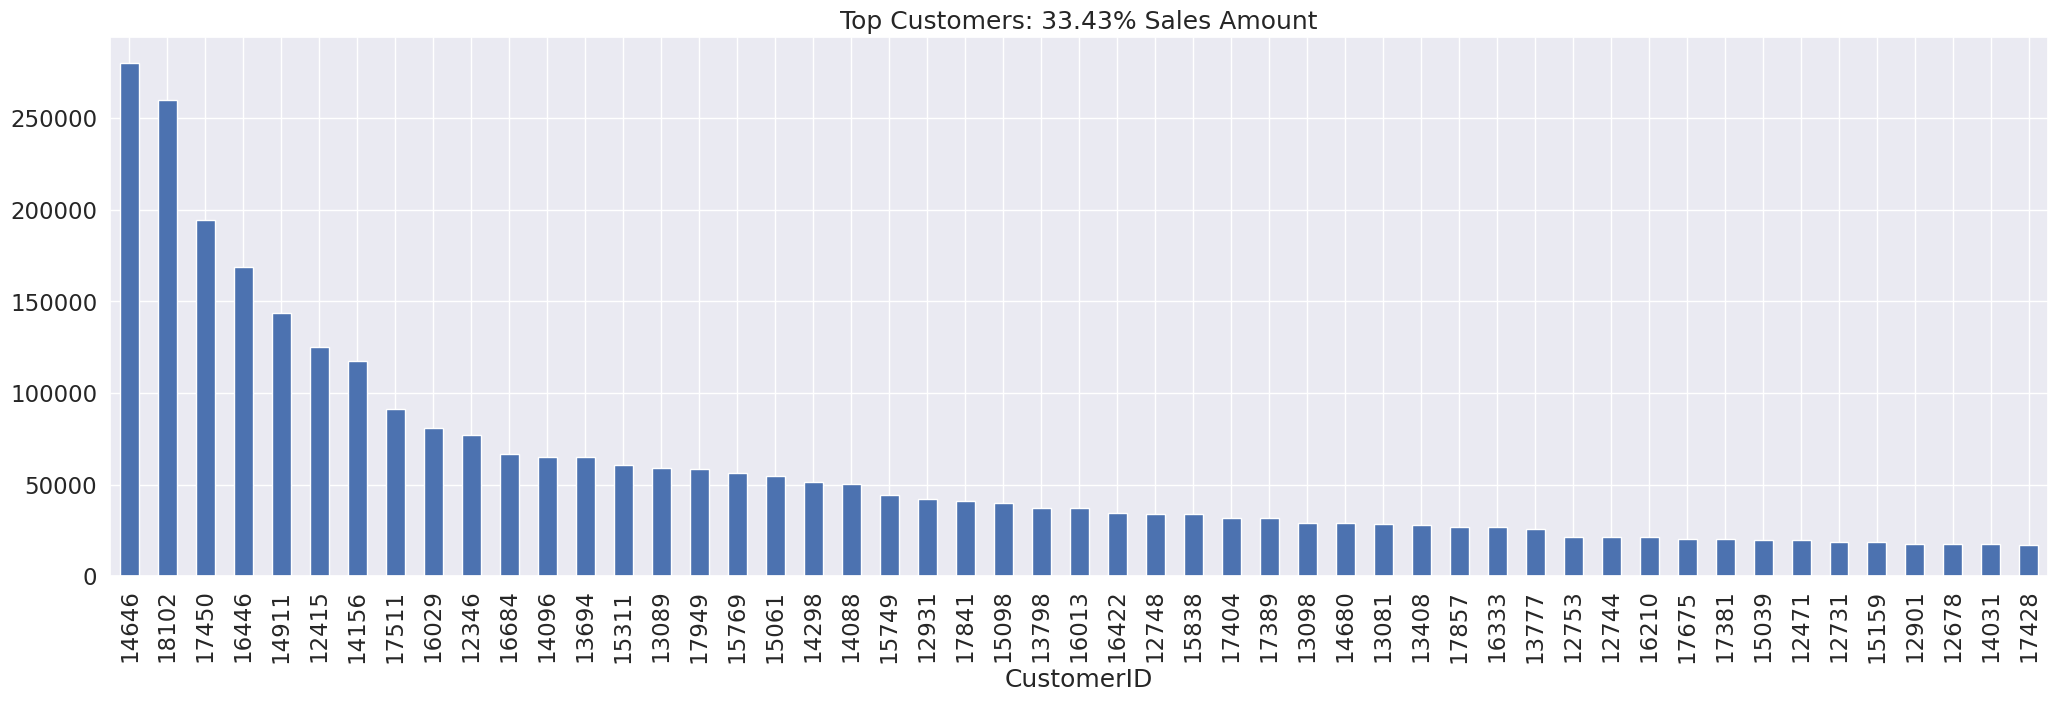

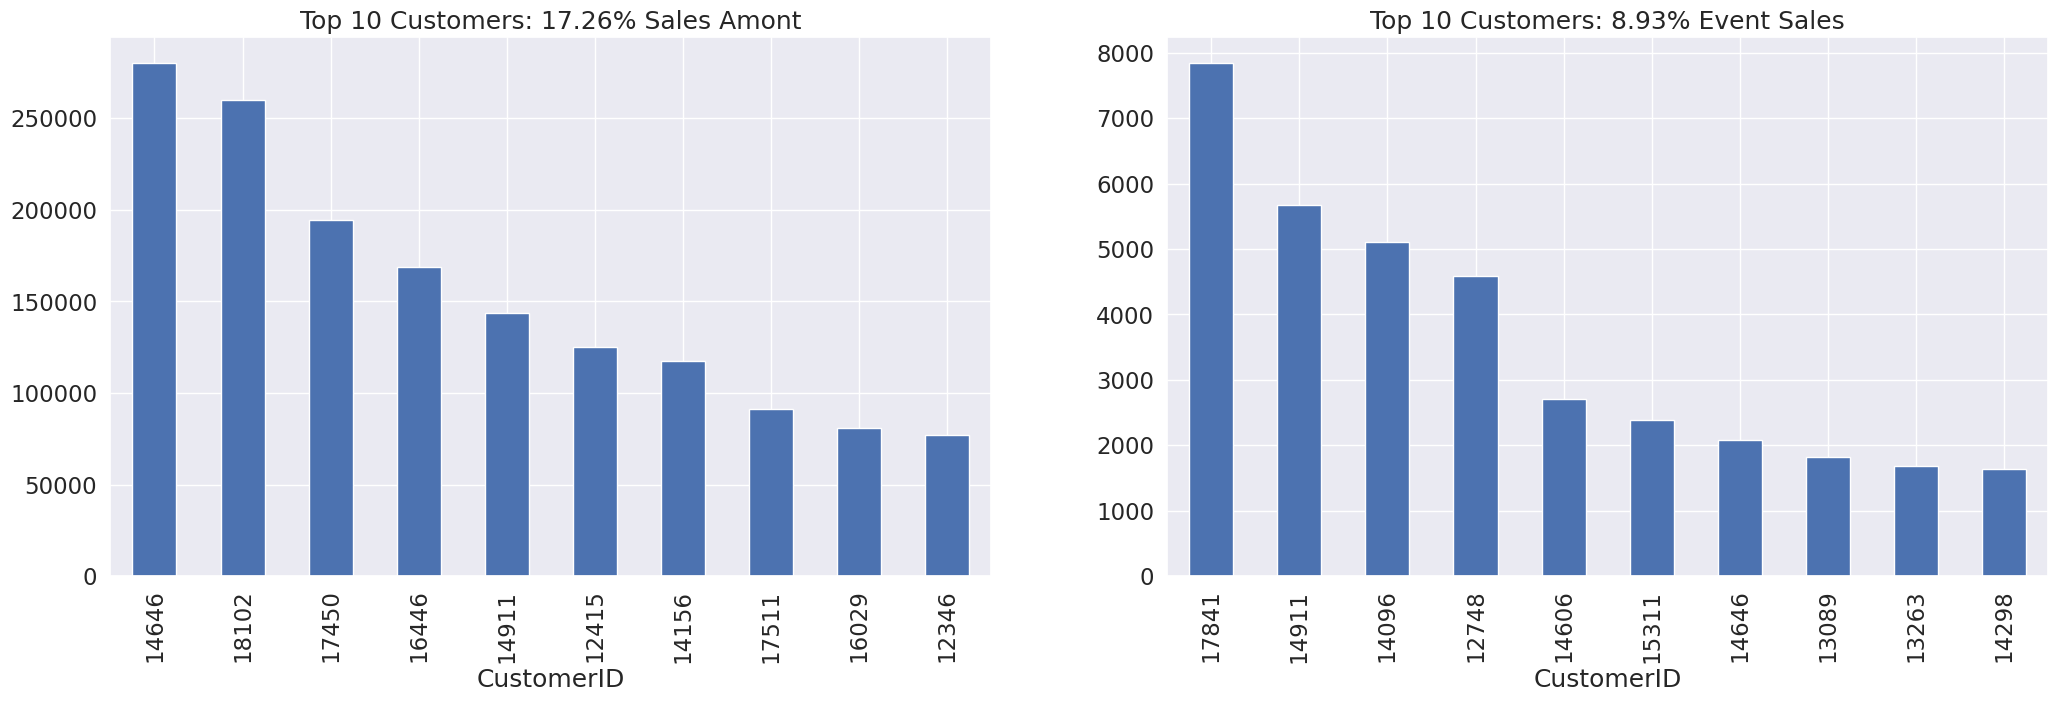

In [ ]:
fig = plt.figure(figsize=(25, 7))
PercentSales =  np.round((cs_df.groupby(["CustomerID"]).Amount.sum().\
                          sort_values(ascending = False)[:51].sum()/cs_df.groupby(["CustomerID"]).\
                          Amount.sum().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["CustomerID"]).Amount.sum().sort_values(ascending = False)[:51].\
    plot(kind='bar', title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales))

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
PercentSales =  np.round((cs_df.groupby(["CustomerID"]).Amount.sum().\
                          sort_values(ascending = False)[:10].sum()/cs_df.groupby(["CustomerID"]).\
                          Amount.sum().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["CustomerID"]).Amount.sum().sort_values(ascending = False)[:10]\
    .plot(kind='bar', title='Top 10 Customers: {:3.2f}% Sales Amont'.format(PercentSales))
f1 = fig.add_subplot(122)
PercentSales =  np.round((cs_df.groupby(["CustomerID"]).Amount.count().\
                          sort_values(ascending = False)[:10].sum()/cs_df.groupby(["CustomerID"]).\
                          Amount.count().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["CustomerID"]).Amount.count().sort_values(ascending = False)[:10].\
    plot(kind='bar', title='Top 10 Customers: {:3.2f}% Event Sales'.format(PercentSales))

In [ ]:
cs_df.describe()

InvoiceNo       Quantity      UnitPrice     CustomerID  \
count  397884.000000  397884.000000  397884.000000  397884.000000   
mean   560616.934451      12.988238       3.116488   15294.423453   
std     13106.117773     179.331775      22.097877    1713.141560   
min    536365.000000       1.000000       0.001000   12346.000000   
25%    549234.000000       2.000000       1.250000   13969.000000   
50%    561893.000000       6.000000       1.950000   15159.000000   
75%    572090.000000      12.000000       3.750000   16795.000000   
max    581587.000000   80995.000000    8142.750000   18287.000000   

              Amount  
count  397884.000000  
mean       22.397000  
std       309.071041  
min         0.001000  
25%         4.680000  
50%        11.800000  
75%        19.800000  
max    168469.600000

In [ ]:
rstr(cs_df)

Data shape: (397884, 10)
___________________________
Data types:
 object            4
int64             3
float64           2
datetime64[ns]    1
Name: types, dtype: int64
___________________________


types  counts  distincts  nulls  missing_ratio  \
Amount              float64  397884       2939      0            0.0   
Country              object  397884         37      0            0.0   
CustomerID            int64  397884       4338      0            0.0   
Description          object  397884       3647      0            0.0   
Internal             object  397884          2      0            0.0   
InvoiceDate  datetime64[ns]  397884      17282      0            0.0   
InvoiceNo             int64  397884      18532      0            0.0   
Quantity              int64  397884        301      0            0.0   
StockCode            object  397884       3665      0            0.0   
UnitPrice           float64  397884        440      0            0.0   

                                                       uniques    skewness  \
Amount       [40.8, 10.2, 0.85, 20.4, 6.8, 8.5, 30.59999999...  451.443182   
Country      [France, United Kingdom, EIRE, Germany, Spain,...         NaN   
CustomerID   [12583, 16098, 17967, 13069, 17677, 15529, 167...    0.025729   
Description  [INFLATABLE POLITICAL GLOBE , GROOVY CACTUS IN...         NaN   
Internal                                             [No, Yes]         NaN   
InvoiceDate  [2010-12-01T08:45:00.000000000, 2010-12-01T09:...         NaN   
InvoiceNo    [536370, 536382, 536863, 537047, 537227, 53777...   -0.178524   
Quantity     [48, 12, 1, 24, 8, 10, 36, 4, 3, 5, 60, 11, 6,...  409.892972   
StockCode    [10002, 10080, 10120, 10125, 10133, 10135, 110...         NaN   
UnitPrice    [0.85, 0.39, 0.21, 0.42, 1.25, 1.06, 2.46, 0.2...  204.032727   

                  kurtosis  
Amount       232155.117219  
Country                NaN  
CustomerID       -1.180822  
Description            NaN  
Internal               NaN  
InvoiceDate            NaN  
InvoiceNo        -1.200748  
Quantity     178186.243253  
StockCode              NaN  
UnitPrice     58140.396673

<Axes: >

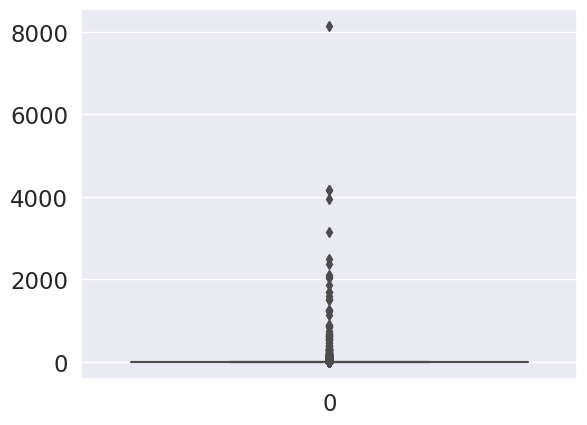

In [ ]:
import seaborn as sns
sns.boxplot(cs_df.UnitPrice)

In [ ]:
cs_df.shape[0]

397884

In [ ]:
cs_df[cs_df.UnitPrice>50].shape[0]

241

In [ ]:
cs_df.describe()

InvoiceNo       Quantity      UnitPrice     CustomerID  \
count  397884.000000  397884.000000  397884.000000  397884.000000   
mean   560616.934451      12.988238       3.116488   15294.423453   
std     13106.117773     179.331775      22.097877    1713.141560   
min    536365.000000       1.000000       0.001000   12346.000000   
25%    549234.000000       2.000000       1.250000   13969.000000   
50%    561893.000000       6.000000       1.950000   15159.000000   
75%    572090.000000      12.000000       3.750000   16795.000000   
max    581587.000000   80995.000000    8142.750000   18287.000000   

              Amount  
count  397884.000000  
mean       22.397000  
std       309.071041  
min         0.001000  
25%         4.680000  
50%        11.800000  
75%        19.800000  
max    168469.600000

In [ ]:
cs_df_filtered = cs_df[cs_df.UnitPrice<4000]
rstr(cs_df_filtered)

Data shape: (397881, 10)
___________________________
Data types:
 object            4
int64             3
float64           2
datetime64[ns]    1
Name: types, dtype: int64
___________________________


types  counts  distincts  nulls  missing_ratio  \
Amount              float64  397881       2937      0            0.0   
Country              object  397881         37      0            0.0   
CustomerID            int64  397881       4338      0            0.0   
Description          object  397881       3647      0            0.0   
Internal             object  397881          2      0            0.0   
InvoiceDate  datetime64[ns]  397881      17280      0            0.0   
InvoiceNo             int64  397881      18529      0            0.0   
Quantity              int64  397881        301      0            0.0   
StockCode            object  397881       3665      0            0.0   
UnitPrice           float64  397881        438      0            0.0   

                                                       uniques    skewness  \
Amount       [40.8, 10.2, 0.85, 20.4, 6.8, 8.5, 30.59999999...  453.175070   
Country      [France, United Kingdom, EIRE, Germany, Spain,...         NaN   
CustomerID   [12583, 16098, 17967, 13069, 17677, 15529, 167...    0.025729   
Description  [INFLATABLE POLITICAL GLOBE , GROOVY CACTUS IN...         NaN   
Internal                                             [No, Yes]         NaN   
InvoiceDate  [2010-12-01T08:45:00.000000000, 2010-12-01T09:...         NaN   
InvoiceNo    [536370, 536382, 536863, 537047, 537227, 53777...   -0.178519   
Quantity     [48, 12, 1, 24, 8, 10, 36, 4, 3, 5, 60, 11, 6,...  409.891446   
StockCode    [10002, 10080, 10120, 10125, 10133, 10135, 110...         NaN   
UnitPrice    [0.85, 0.39, 0.21, 0.42, 1.25, 1.06, 2.46, 0.2...  134.711450   

                  kurtosis  
Amount       233381.143937  
Country                NaN  
CustomerID       -1.180821  
Description            NaN  
Internal               NaN  
InvoiceDate            NaN  
InvoiceNo        -1.200748  
Quantity     178184.910925  
StockCode              NaN  
UnitPrice     24095.492919

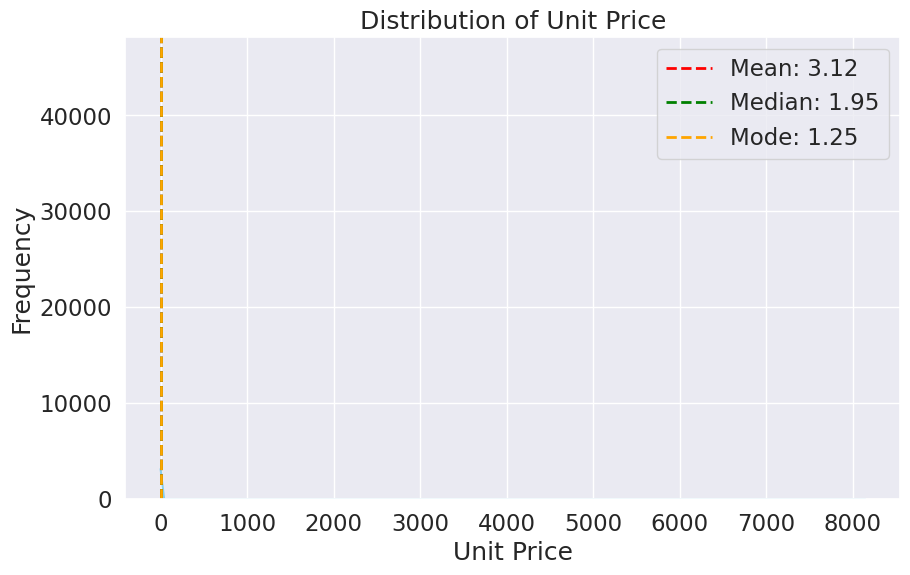

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cs_df is your DataFrame and 'UnitPrice' is the column you want to plot
plt.figure(figsize=(10, 6))

# Plotting the distribution curve
sns.histplot(cs_df['UnitPrice'], kde=True, color='skyblue')

# Calculating mean, median, and mode
mean_price = cs_df['UnitPrice'].mean()
median_price = cs_df['UnitPrice'].median()
mode_price = cs_df['UnitPrice'].mode().values[0]

# Plotting mean, median, and mode lines
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_price}')
plt.axvline(mode_price, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_price}')

# Adding labels and title
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Price')
plt.legend()

# Show plot
plt.show()


In [ ]:
rstr(cs_df)

Data shape: (397884, 10)
___________________________
Data types:
 object            4
int64             3
float64           2
datetime64[ns]    1
Name: types, dtype: int64
___________________________


types  counts  distincts  nulls  missing_ratio  \
Amount              float64  397884       2939      0            0.0   
Country              object  397884         37      0            0.0   
CustomerID            int64  397884       4338      0            0.0   
Description          object  397884       3647      0            0.0   
Internal             object  397884          2      0            0.0   
InvoiceDate  datetime64[ns]  397884      17282      0            0.0   
InvoiceNo             int64  397884      18532      0            0.0   
Quantity              int64  397884        301      0            0.0   
StockCode            object  397884       3665      0            0.0   
UnitPrice           float64  397884        440      0            0.0   

                                                       uniques    skewness  \
Amount       [40.8, 10.2, 0.85, 20.4, 6.8, 8.5, 30.59999999...  451.443182   
Country      [France, United Kingdom, EIRE, Germany, Spain,...         NaN   
CustomerID   [12583, 16098, 17967, 13069, 17677, 15529, 167...    0.025729   
Description  [INFLATABLE POLITICAL GLOBE , GROOVY CACTUS IN...         NaN   
Internal                                             [No, Yes]         NaN   
InvoiceDate  [2010-12-01T08:45:00.000000000, 2010-12-01T09:...         NaN   
InvoiceNo    [536370, 536382, 536863, 537047, 537227, 53777...   -0.178524   
Quantity     [48, 12, 1, 24, 8, 10, 36, 4, 3, 5, 60, 11, 6,...  409.892972   
StockCode    [10002, 10080, 10120, 10125, 10133, 10135, 110...         NaN   
UnitPrice    [0.85, 0.39, 0.21, 0.42, 1.25, 1.06, 2.46, 0.2...  204.032727   

                  kurtosis  
Amount       232155.117219  
Country                NaN  
CustomerID       -1.180822  
Description            NaN  
Internal               NaN  
InvoiceDate            NaN  
InvoiceNo        -1.200748  
Quantity     178186.243253  
StockCode              NaN  
UnitPrice     58140.396673

In [ ]:
x = cs_df.groupby("Description")['StockCode'].count().to_frame().reset_index().sort_values(by="StockCode",ascending=False).head(60)

In [ ]:
unique_stockcode_counts = cs_df.groupby('Description')['StockCode'].nunique().reset_index()

# unique_stockcode_counts now contains two columns: 'Description' and 'StockCodeCount'
unique_stockcode_counts.sort_values(by="StockCode",ascending=False).head(20)


Description  StockCode
1881   METAL SIGN,CUPCAKE SINGLE HOOK          3
1009  EAU DE NILE JEWELLED PHOTOFRAME          2
2704     ROUND BLUE CLOCK WITH SUCKER          2
2314       PINK FLOWERS RABBIT EASTER          2
3460      WHITE BAMBOO RIBS LAMPSHADE          2
2308    PINK FLOCK GLASS CANDLEHOLDER          2
1239     FRENCH FLORAL CUSHION COVER           2
2303    PINK FAIRY CAKE CUSHION COVER          2
1242    FRENCH LATTICE CUSHION COVER           2
2630         RETRO PLASTIC DAISY TRAY          2
2629          RETRO PLASTIC 70'S TRAY          2
2632         RETRO PLASTIC POLKA TRAY          2
785      COLOURING PENCILS BROWN TUBE          2
787        COLUMBIAN CANDLE RECTANGLE          2
788            COLUMBIAN CANDLE ROUND          2
1260              FROSTED WHITE BASE           2
3131    SQUARE CHERRY BLOSSOM CABINET          2
2440      POPPY FIELDS CHOPPING BOARD          1
2433     POLYESTER FILLER PAD 60x40cm          1
2427                     POLKADOT PEN          1

In [ ]:
cs_df[cs_df['Description']=="EAU DE NILE JEWELLED PHOTOFRAME"]

StockCode                      Description  InvoiceNo  Quantity  \
384209    85023B  EAU DE NILE JEWELLED PHOTOFRAME     539469         1   
384210    85023B  EAU DE NILE JEWELLED PHOTOFRAME     541587         1   
384211    85023B  EAU DE NILE JEWELLED PHOTOFRAME     546849         1   
384212    85023B  EAU DE NILE JEWELLED PHOTOFRAME     558620         1   
384213    85023B  EAU DE NILE JEWELLED PHOTOFRAME     564322        72   
384214    85023B  EAU DE NILE JEWELLED PHOTOFRAME     566094         2   
384215    85023B  EAU DE NILE JEWELLED PHOTOFRAME     571188         6   
384216    85023B  EAU DE NILE JEWELLED PHOTOFRAME     571315         6   
384217    85023B  EAU DE NILE JEWELLED PHOTOFRAME     572893         6   
384218    85023B  EAU DE NILE JEWELLED PHOTOFRAME     575868         6   
384219    85023B  EAU DE NILE JEWELLED PHOTOFRAME     576654         1   
384220    85023B  EAU DE NILE JEWELLED PHOTOFRAME     580611         1   
384221    85024B  EAU DE NILE JEWELLED PHOTOFRAME     542617         3   
384222    85024B  EAU DE NILE JEWELLED PHOTOFRAME     543332        12   
384223    85024B  EAU DE NILE JEWELLED PHOTOFRAME     551399         2   
384224    85024B  EAU DE NILE JEWELLED PHOTOFRAME     554160         2   
384225    85024B  EAU DE NILE JEWELLED PHOTOFRAME     558620         1   
384226    85024B  EAU DE NILE JEWELLED PHOTOFRAME     559552         1   
384227    85024B  EAU DE NILE JEWELLED PHOTOFRAME     561894         1   
384228    85024B  EAU DE NILE JEWELLED PHOTOFRAME     562214        12   
384229    85024B  EAU DE NILE JEWELLED PHOTOFRAME     564322       144   
384230    85024B  EAU DE NILE JEWELLED PHOTOFRAME     566094         2   
384231    85024B  EAU DE NILE JEWELLED PHOTOFRAME     577479        12   
384232    85024B  EAU DE NILE JEWELLED PHOTOFRAME     580639         1   

               InvoiceDate  UnitPrice  CustomerID         Country  Amount  \
384209 2010-12-19 13:59:00       2.55       17841  United Kingdom    2.55   
384210 2011-01-19 14:39:00       2.55       17841  United Kingdom    2.55   
384211 2011-03-17 13:13:00       2.55       13623  United Kingdom    2.55   
384212 2011-06-30 16:39:00       2.55       15584  United Kingdom    2.55   
384213 2011-08-24 13:23:00       2.10       13694  United Kingdom  151.20   
384214 2011-09-09 10:42:00       2.55       17965  United Kingdom    5.10   
384215 2011-10-14 11:42:00       2.55       12783        Portugal   15.30   
384216 2011-10-17 10:47:00       2.55       16542  United Kingdom   15.30   
384217 2011-10-26 14:36:00       2.55       18059  United Kingdom   15.30   
384218 2011-11-11 12:44:00       2.55       12985  United Kingdom   15.30   
384219 2011-11-16 10:55:00       2.55       15584  United Kingdom    2.55   
384220 2011-12-05 11:49:00       2.55       12748  United Kingdom    2.55   
384221 2011-01-30 15:48:00       1.65       17463  United Kingdom    4.95   
384222 2011-02-07 12:24:00       1.65       13955  United Kingdom   19.80   
384223 2011-04-28 13:17:00       1.65       17874  United Kingdom    3.30   
384224 2011-05-23 11:49:00       1.65       17841  United Kingdom    3.30   
384225 2011-06-30 16:39:00       1.65       15584  United Kingdom    1.65   
384226 2011-07-10 16:29:00       1.65       16014  United Kingdom    1.65   
384227 2011-07-31 15:00:00       1.65       14456  United Kingdom    1.65   
384228 2011-08-03 13:39:00       1.65       17731  United Kingdom   19.80   
384229 2011-08-24 13:23:00       1.45       13694  United Kingdom  208.80   
384230 2011-09-09 10:42:00       1.65       17965  United Kingdom    3.30   
384231 2011-11-20 11:34:00       1.65       14911            EIRE   19.80   
384232 2011-12-05 12:46:00       1.65       17254  United Kingdom    1.65   

       Internal  
384209      Yes  
384210      Yes  
384211      Yes  
384212      Yes  
384213      Yes  
384214      Yes  
384215       No  
384216      Yes  
384217      Yes  
384218      Yes  
384219      Yes  
384220      Ye

In [ ]:
cs_df[cs_df['StockCode']=="82613"]

Empty DataFrame
Columns: [StockCode, Description, InvoiceNo, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Amount, Internal]
Index: []

In [ ]:
x.StockCode.sum()

56197

In [ ]:
cs_df[cs_df['StockCode']=="85123A"]

StockCode                         Description  InvoiceNo  Quantity  \
390619    85123A  WHITE HANGING HEART T-LIGHT HOLDER     536365         6   
390620    85123A  WHITE HANGING HEART T-LIGHT HOLDER     536373         6   
390621    85123A  WHITE HANGING HEART T-LIGHT HOLDER     536375         6   
390622    85123A  WHITE HANGING HEART T-LIGHT HOLDER     536390        64   
390623    85123A  WHITE HANGING HEART T-LIGHT HOLDER     536394        32   
...          ...                                 ...        ...       ...   
392649    85123A  WHITE HANGING HEART T-LIGHT HOLDER     581412         4   
392650    85123A  WHITE HANGING HEART T-LIGHT HOLDER     581432        32   
392651    85123A  WHITE HANGING HEART T-LIGHT HOLDER     581452        32   
392652    85123A  WHITE HANGING HEART T-LIGHT HOLDER     581472         6   
392653    85123A  WHITE HANGING HEART T-LIGHT HOLDER     581538         1   

               InvoiceDate  UnitPrice  CustomerID         Country  Amount  \
390619 2010-12-01 08:26:00       2.55       17850  United Kingdom   15.30   
390620 2010-12-01 09:02:00       2.55       17850  United Kingdom   15.30   
390621 2010-12-01 09:32:00       2.55       17850  United Kingdom   15.30   
390622 2010-12-01 10:19:00       2.55       17511  United Kingdom  163.20   
390623 2010-12-01 10:39:00       2.55       13408  United Kingdom   81.60   
...                    ...        ...         ...             ...     ...   
392649 2011-12-08 14:38:00       2.95       14415  United Kingdom   11.80   
392650 2011-12-08 15:51:00       2.55       13798  United Kingdom   81.60   
392651 2011-12-08 18:03:00       2.55       17675  United Kingdom   81.60   
392652 2011-12-08 19:55:00       2.95       15796  United Kingdom   17.70   
392653 2011-12-09 11:34:00       2.95       14446  United Kingdom    2.95   

       Internal  
390619      Yes  
390620      Yes  
390621      Yes  
390622      Yes  
390623      Yes  
...         ...  
392649      Yes  
392650      Yes  
392651      Yes  
392652      Yes  
392653      Yes  

[2035 rows x 10 columns]

## Customer Segmentation:
Customer segmentation is similarly the process of dividing an organization’s customer bases into different sections or segments based on various customer attributes.  The process of customer segmentation is based on the premise of finding differences among the customers’ behavior and patterns.

The major objectives and benefits behind the motivation for customer segmentation are:
* **Higher Revenue**: This is the most obvious requirement of any customer segmentation project.
* **Customer Understanding**: One of the mostly widely accepted business paradigms is “know your customer” and a segmentation of the customer base allows for a perfect dissection of this paradigm.
* **Target Marketing**:  The most visible reason for customer segmentation is the ability to focus marketing efforts effectively and efficiently. If a firm knows the different segments of its customer base, it can devise better marketing campaigns which are tailor made for the segment. A good segmentation model allows for better understanding of customer requirements and hence increases the chances of the success of any marketing campaign developed by the organization.
* **Optimal Product Placement**: A good customer segmentation strategy can also help the firm with developing or offering new products, or a bundle of products together as a combined offering.
* **Finding Latent Customer Segments**: Finding out which segment of customers it might be missing to identifying untapped customer segments by focused on marketing campaigns or new business development.

**Clustering**:

The most obvious method to perform customer segmentation is using unsupervised Machine Learning methods like clustering.  The method is as simple as collecting as much data about the customers as possible in the form of features or attributes and then finding out the different clusters that can be obtained from that data. Finally, we can find traits of customer segments by analyzing the characteristics of the clusters.

**Exploratory Data Analysis**:

Using exploratory data analysis is another way of finding out customer segments. This is usually done by analysts who have a good knowledge about the domain relevant to both products and customers. It can be done flexibly to include the top decision points in an analysis.

### RFM Model for Customer Value:

Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a **RFM**,***Recency, Frequency and Monetary Value**, based model of customer value for finding our customer segments.
 The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:
- **Recency**: The value of how recently a customer purchased at the establishment
- **Frequency**: How frequent the customer’s transactions are at the establishment
- **Monetary value**: The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment

#### Recency
To create the recency feature variable, we need to decide the reference date for our analysis. Usually, we make use of the last transaction date plus one day. Then, we will construct the recency variable as the number of days before the reference date when a customer last made a purchase.

In [ ]:
reference_date = cs_df.InvoiceDate.max() + datetime.timedelta(days = 1)
print('Reference Date:', reference_date)
cs_df['days_since_last_purchase'] = (reference_date - cs_df.InvoiceDate).astype('timedelta64[D]')
customer_history_df =  cs_df[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase':'recency'}, inplace=True)
customer_history_df.describe().transpose()

Reference Date: 2011-12-10 12:50:00


count          mean          std      min       25%      50%  \
CustomerID  4338.0  15300.408022  1721.808492  12346.0  13813.25  15299.5   
recency     4338.0     92.536422   100.014169      1.0     18.00     51.0   

                 75%      max  
CustomerID  16778.75  18287.0  
recency       142.00    374.0

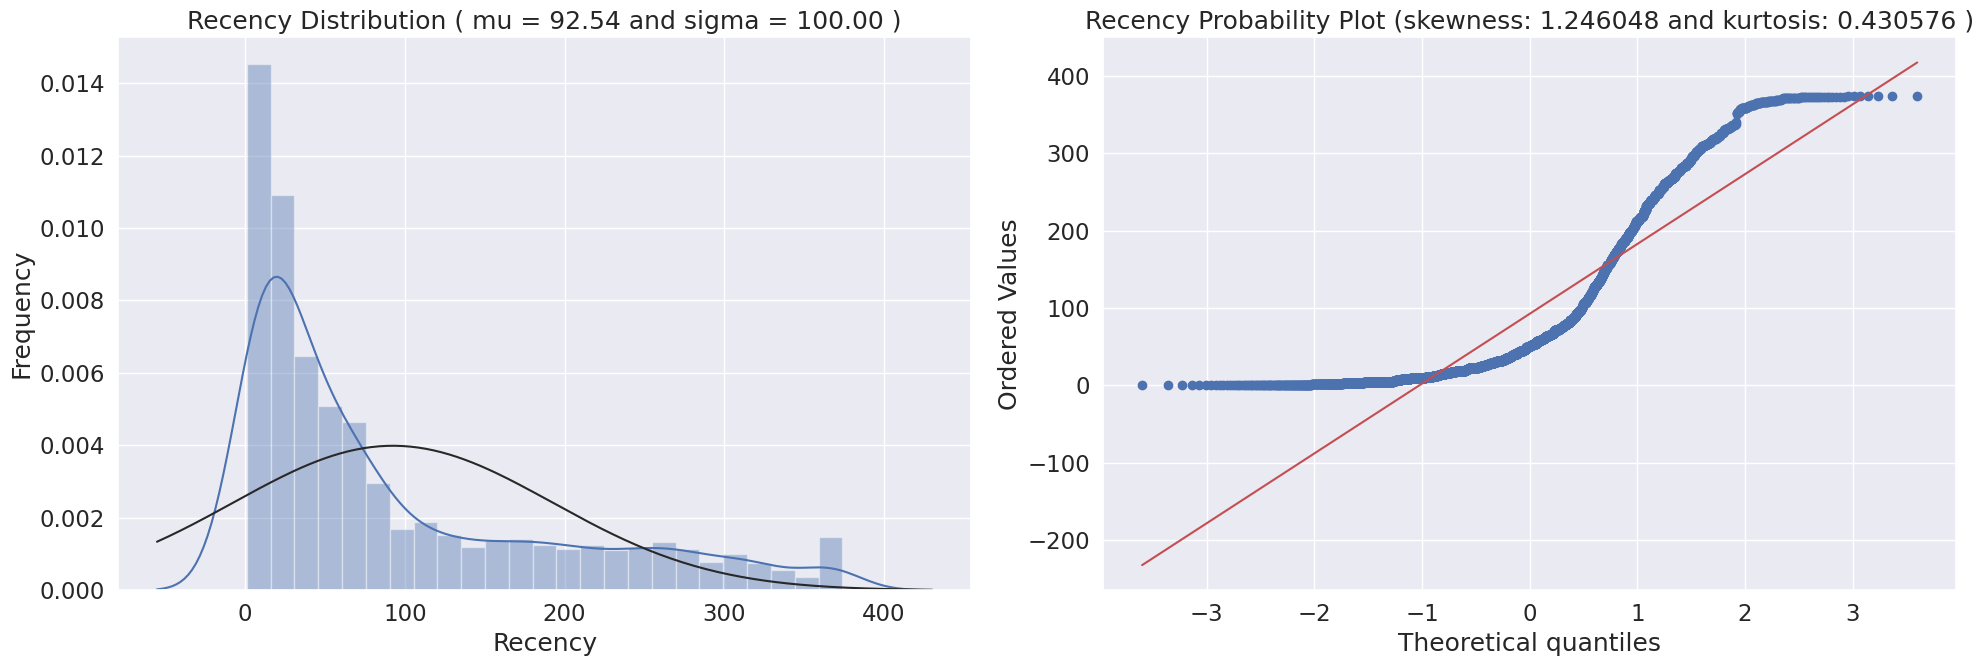

In [ ]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

QQ_plot(customer_history_df.recency, 'Recency')

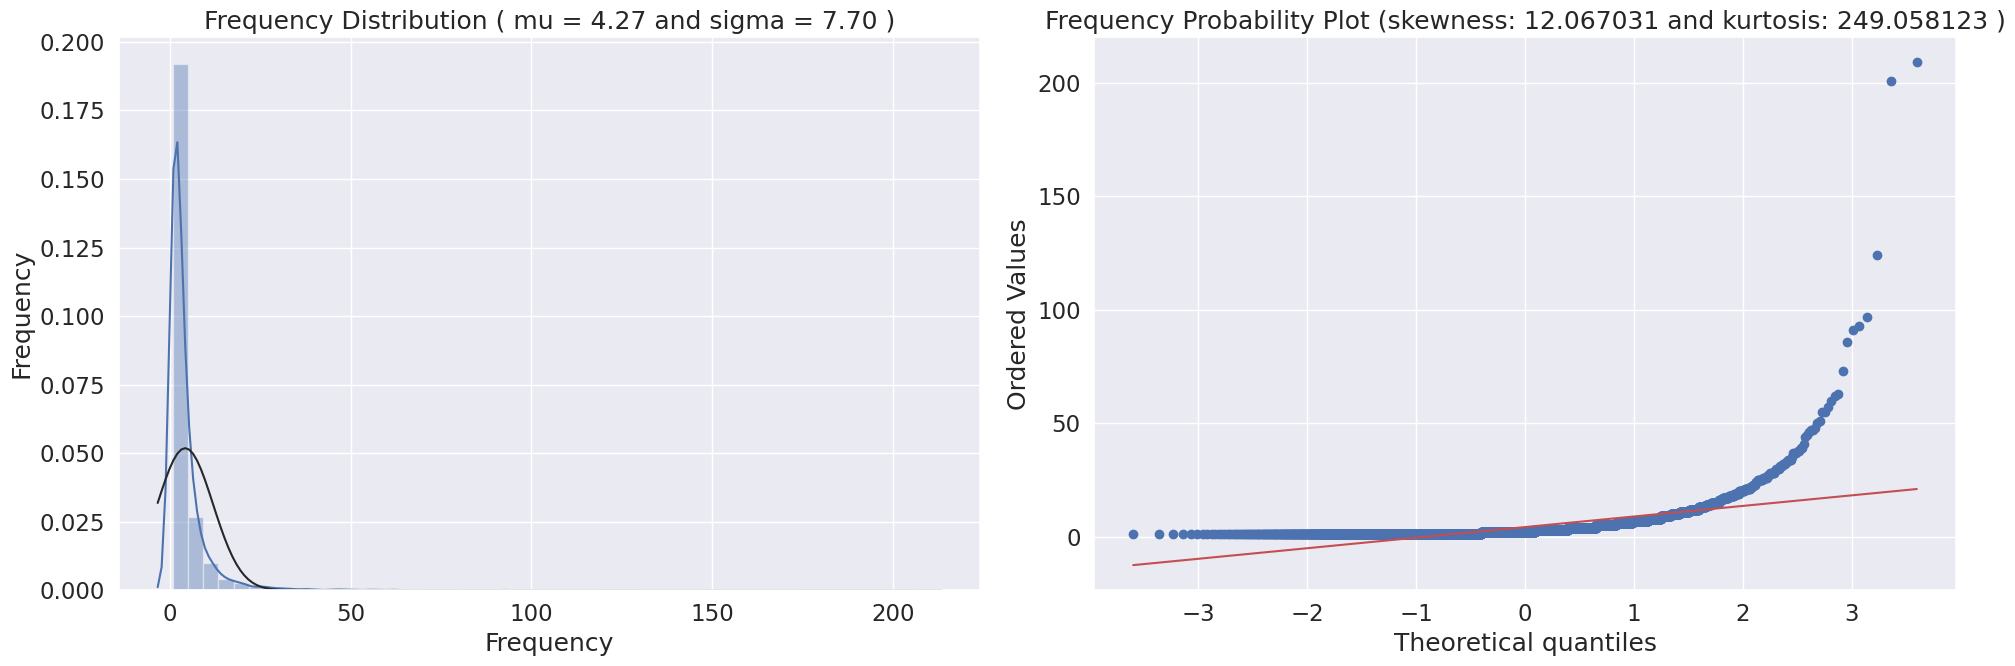

In [ ]:
customer_freq = (cs_df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq)
QQ_plot(customer_history_df.frequency, 'Frequency')

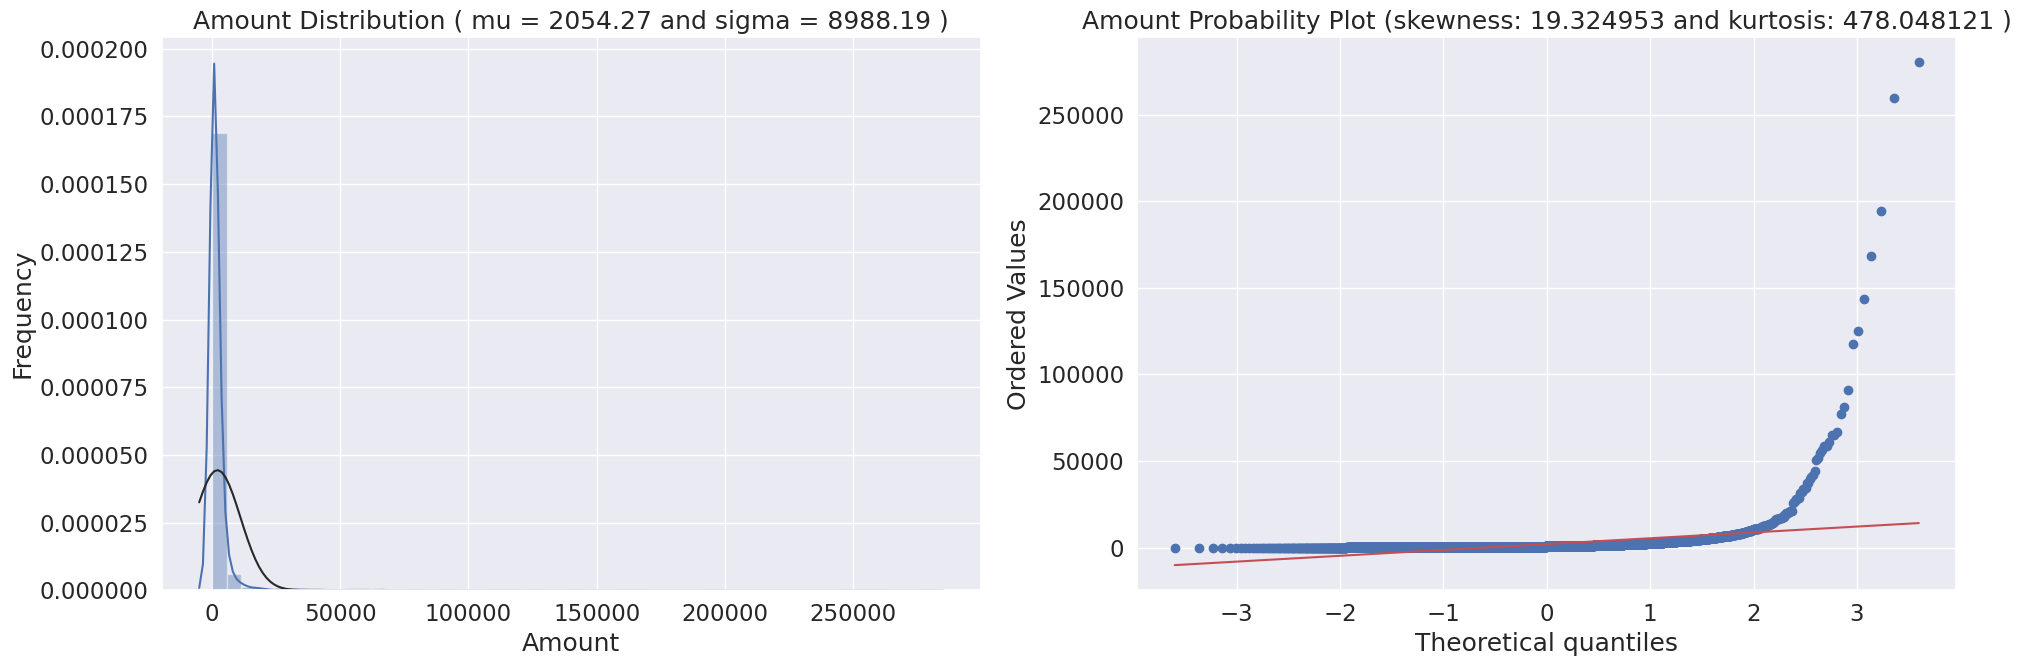

In [ ]:
customer_monetary_val = cs_df[['CustomerID', 'Amount']].groupby("CustomerID").sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val)
QQ_plot(customer_history_df.Amount, 'Amount')

In [ ]:
customer_history_df.describe()

CustomerID      recency    frequency         Amount
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2054.266460
std     1721.808492   100.014169     7.697998    8989.230441
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     307.415000
50%    15299.500000    51.000000     2.000000     674.485000
75%    16778.750000   142.000000     5.000000    1661.740000
max    18287.000000   374.000000   209.000000  280206.020000

### Data Preprocessing
Once we have created our customer value dataset, we will perform some preprocessing on the data. For our clustering, we will be using the K-means clustering algorithm. One of the requirements for proper functioning of the algorithm is the mean centering of the variable values. Mean centering of a variable value means that we will replace the actual value of the variable with a standardized value, so that the variable has a mean of 0 and variance of 1. This ensures that all the variables are in the same range and the difference in ranges of values doesn't cause the algorithm to not perform well. This is akin to feature scaling.

Another problem that you can investigate about is the huge range of values each variable can take. This
problem is particularly noticeable for the monetary Amount variable. To take care of this problem, we will transform all the variables on the log scale. This transformation, along with the standardization, will ensure that the input to our algorithm is a homogenous set of scaled and transformed values.

An important point about the data preprocessing step is that sometimes we need it to be reversible. In our case, we will have the clustering results in terms of the log transformed and scaled variable. But to make inferences in terms of the original data, we will need to reverse transform all the variable so that we get back the actual RFM figures. This can be done by using the preprocessing capabilities of Python.

In [ ]:
customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(math.log)
customer_history_df['Amount_log'] = customer_history_df['Amount'].apply(math.log)
feature_vector = ['Amount_log', 'recency_log','frequency_log']
X_subset = customer_history_df[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

count          mean       std       min       25%       50%  \
Amount_log     4338.0 -6.879390e-16  1.000115 -4.179280 -0.684183 -0.060942   
recency_log    4338.0 -1.048288e-16  1.000115 -2.630445 -0.612424  0.114707   
frequency_log  4338.0 -9.991495e-17  1.000115 -1.048610 -1.048610 -0.279044   

                    75%       max  
Amount_log     0.654244  4.721395  
recency_log    0.829652  1.505796  
frequency_log  0.738267  4.882714

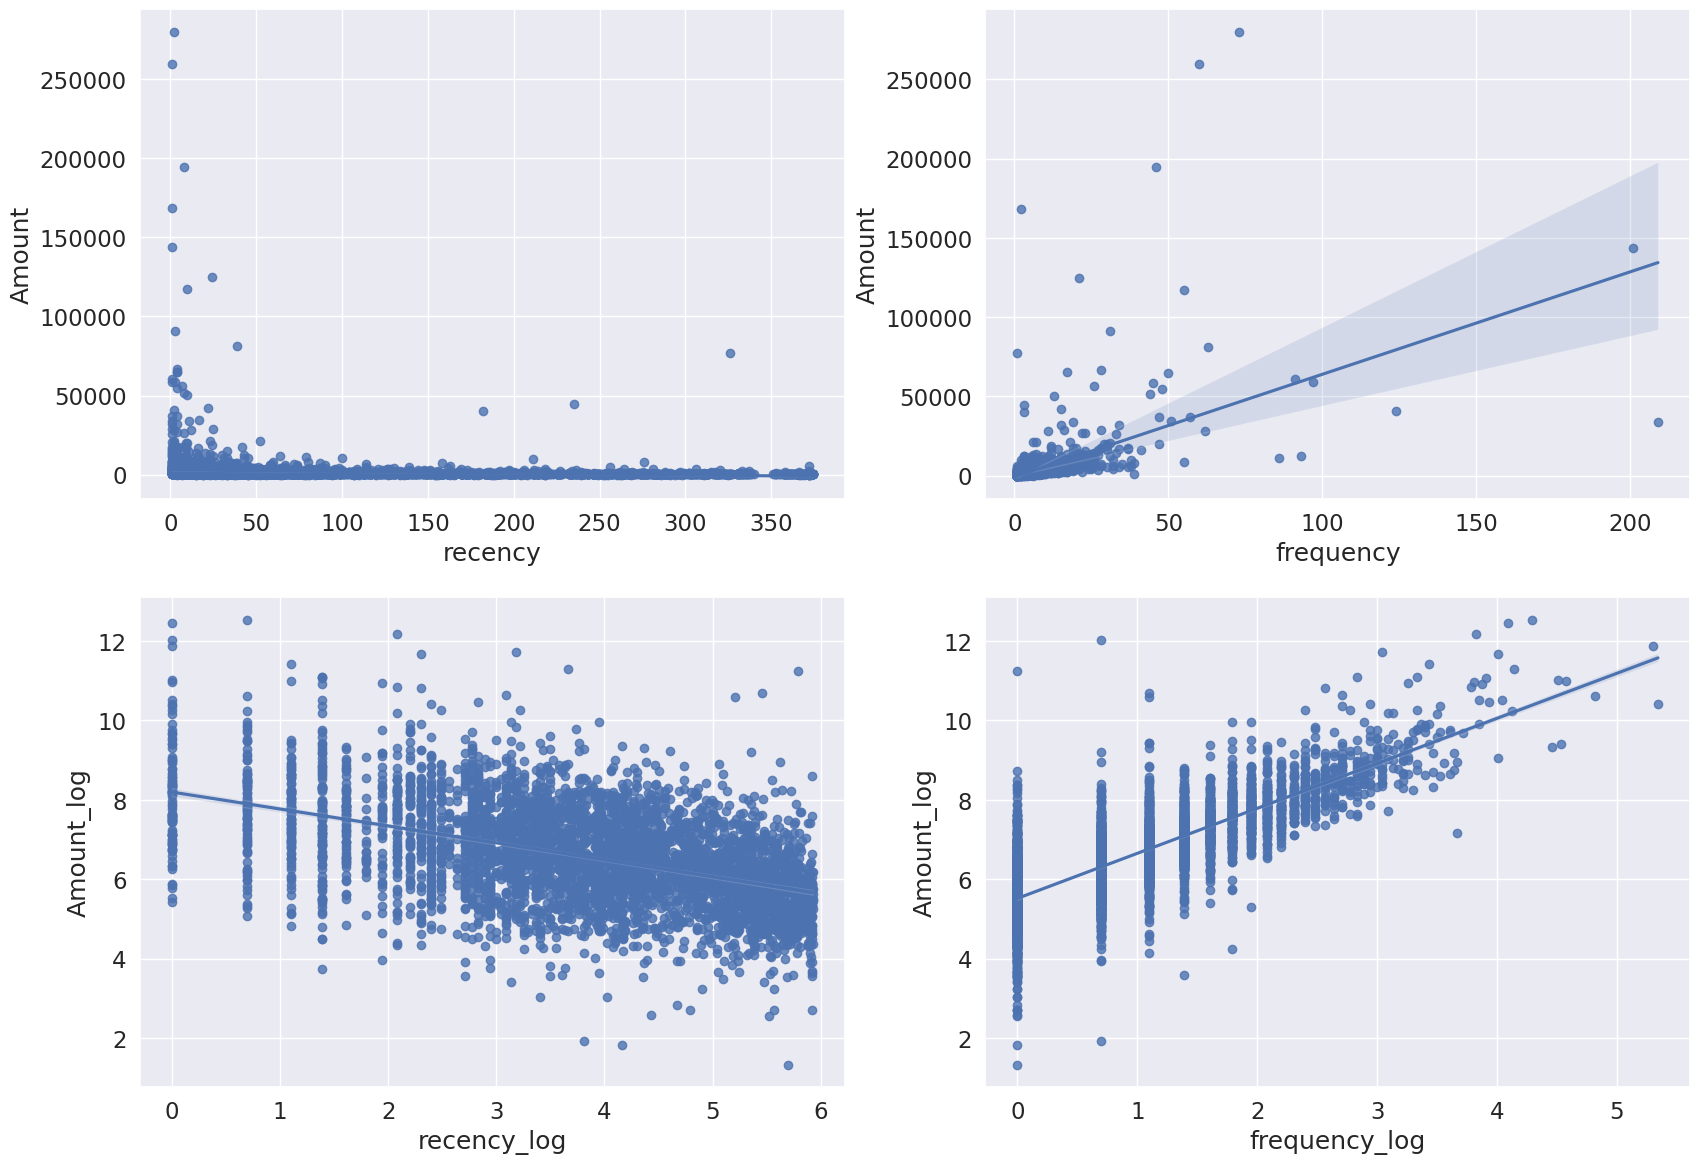

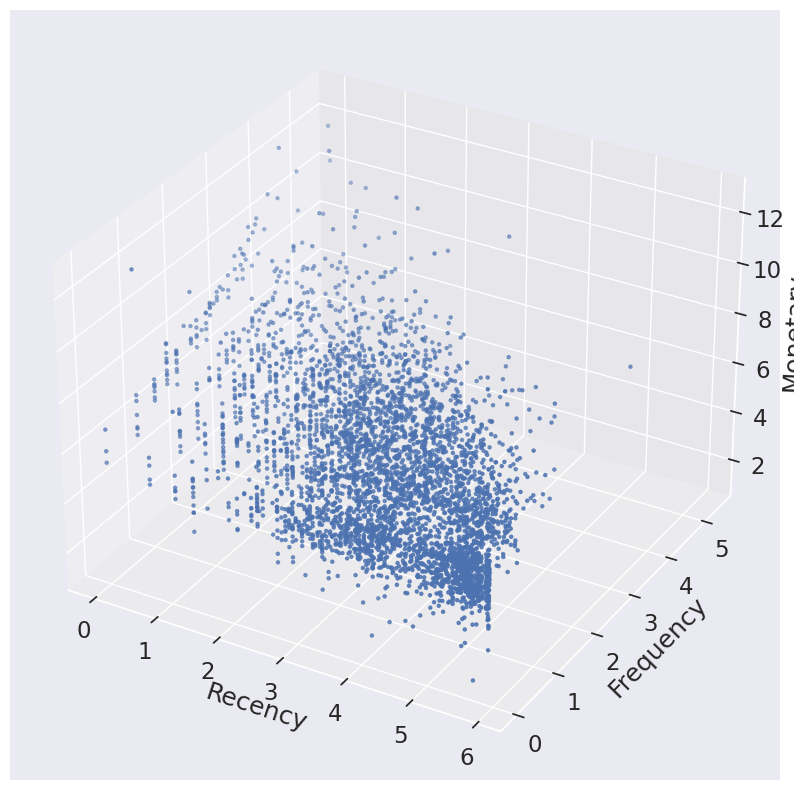

In [ ]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='Amount', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='Amount', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='Amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='Amount_log', data=customer_history_df)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.Amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

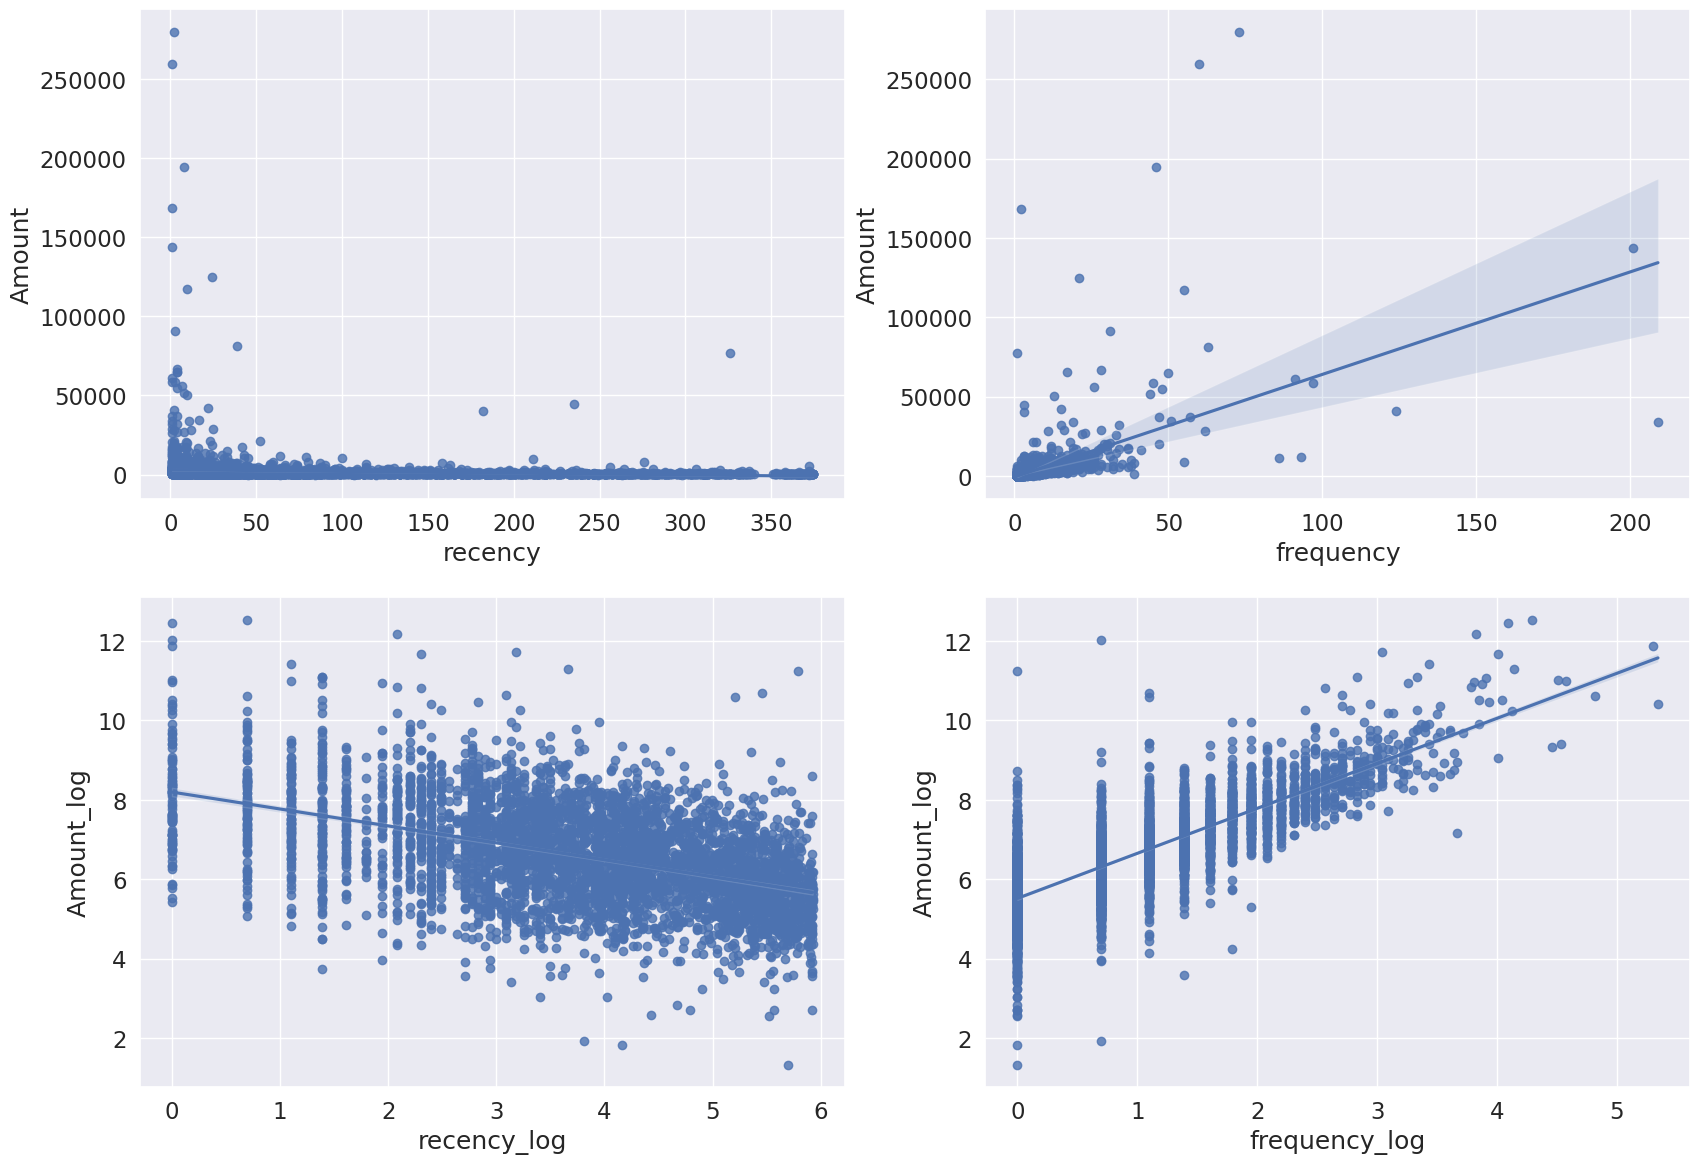

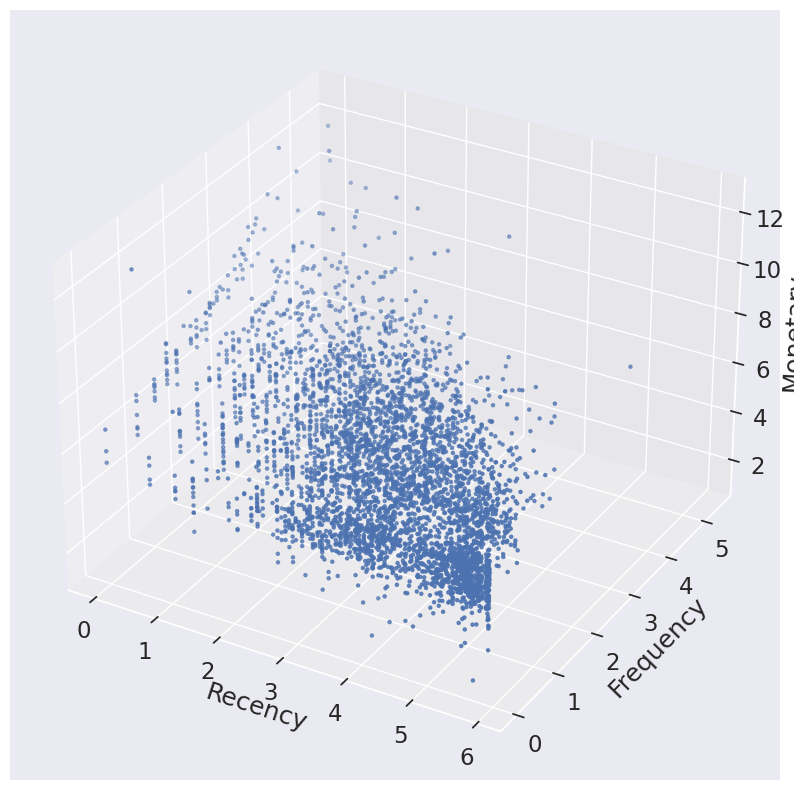

In [ ]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='Amount', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='Amount', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='Amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='Amount_log', data=customer_history_df)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.Amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

### Clustering for Segments
#### K-Means Clustering
The K-means clustering belongs to the partition based\centroid based hard clustering family of algorithms, a family of algorithms where each sample in a dataset is assigned to exactly one cluster.

Based on this Euclidean distance metric, we can describe the k-means algorithm as a simple optimization problem, an iterative approach for minimizing the within-cluster sum of squared errors (SSE), which is sometimes also called cluster inertia. So, the objective of K-Means clustering is to minimize total intra-cluster variance, or, the squared error function:
![image](https://www.saedsayad.com/images/Clustering_kmeans_c.png)

The steps that happen in the K-means algorithm for partitioning the data are as given follows:
1. The algorithm starts with random point initializations of the required number of centers. The “K” in K-means stands for the number of clusters.
2. In the next step, each of the data point is assigned to the center closest to it. The distance metric used in K-means clustering is normal Euclidian distance.
3. Once the data points are assigned, the centers are recalculated by averaging the dimensions of the points belonging to the cluster.
4. The process is repeated with new centers until we reach a point where the assignments become stable. In this case, the algorithm terminates.

##### K-means++
- Place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.
- To use k-means++ with scikit-learn's KMeans object, we just need to set the init parameter to k-means++ (the default setting) instead of random.

#### The Elbow Method
  
Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.

This method looks at the percentage of variance explained as a function of the number of clusters. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.

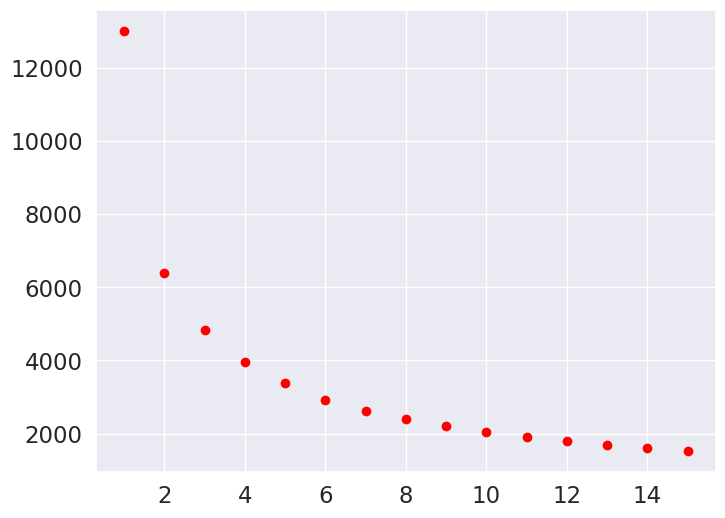

The best K suggest:  7


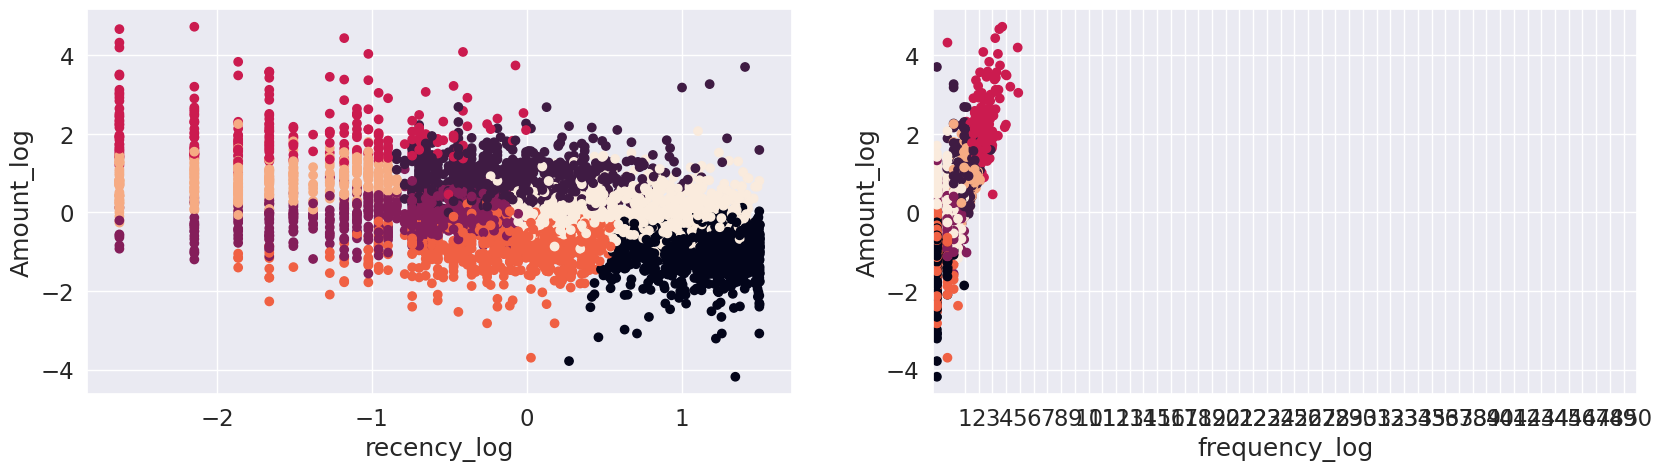

In [ ]:
cl = 15
corte = 0.1

anterior = 100000000000000
cost = []
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k,
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K suggest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])
plt.xticks([i for i in range(1, 51)])

plt.show()

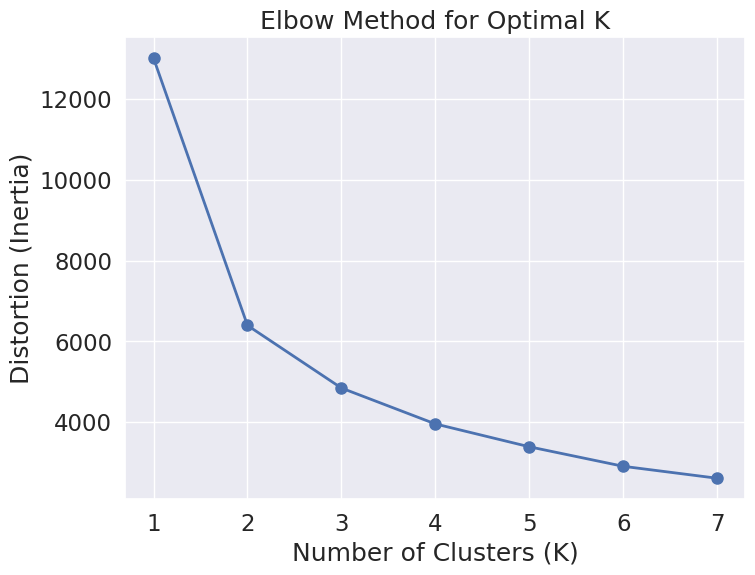

Optimal number of clusters (K) using the elbow method: 7


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_scaled is your 2D array

# Calculate distortion (inertia) for different values of K
distortions = []
K_range = range(1, 8)  # You can adjust the range of K values as needed

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=101)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Determine the optimal K value (elbow point)
optimal_k = K_range[distortions.index(min(distortions))]
print("Optimal number of clusters (K) using the elbow method:", optimal_k)


In [ ]:
cost

[13013.999999999982,
 6396.77107911195,
 4846.038691111025,
 3957.1427358727274,
 3391.469517826352,
 2907.9436145667887,
 2612.04228872829,
 2402.556965510163,
 2209.8235089561967,
 2043.3854268217037,
 1909.2277054074325,
 1793.1255616317274,
 1693.2511752214307,
 1607.9710644663098,
 1530.3148582253166]

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(3, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=101)
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
optimal_k

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=101)
    kmeans.fit(X_scaled)
    db_index = davies_bouldin_score(X_scaled, kmeans.labels_)
    db_scores.append(db_index)

optimal_k = K_range[db_scores.index(min(db_scores))]


#### Silhouette analysis on K-Means clustering

Silhouette analysis can be used to study the separation distance between the resulting clusters, as a strategy to quantifying the quality of clustering via graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

It can also be applied to clustering algorithms other than k-means

Silhouette coefficients has a range of \[-1, 1\], it calculated by:
1. Calculate the cluster cohesion a( i )as the average distance between a sample x( i )   and all other points in the same cluster.
2. Calculate the cluster separation b( i ) from the next closest cluster as the average distance between the sample x( i ) and all samples in the nearest cluster.
3. Calculate the silhouette s( i )  as the difference between cluster cohesion and separation divided by the greater of the two, as shown here:
![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/3d80ab22fb291b347b2d9dc3cc7cd614f6b15479)
Which can be also written as:
![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/ab5579a6c7150579af8a0d432b6630ba529376f0)

Where:
- If near +1, it indicate that the sample is far away from the neighboring clusters.
- a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate.
- If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters
- Negative values indicate that those samples might have been assigned to the wrong cluster.

The silhouette plot can shows a bad K clusters pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. A good k clusters can found when all the plots are more or less of similar thickness and hence are of similar sizes.

Although we have to keep in mind that in several cases and scenarios, sometimes we may have to drop the mathematical explanation given by the algorithm and look at the business relevance of the results obtained.

Let's see below how our data perform for each K clusters groups (3, 5 and 7) in the silhouette score of each cluster, along with the center of each of the cluster discovered in the scatter plots, by amount_log vs recency_log and vs frequency_log.

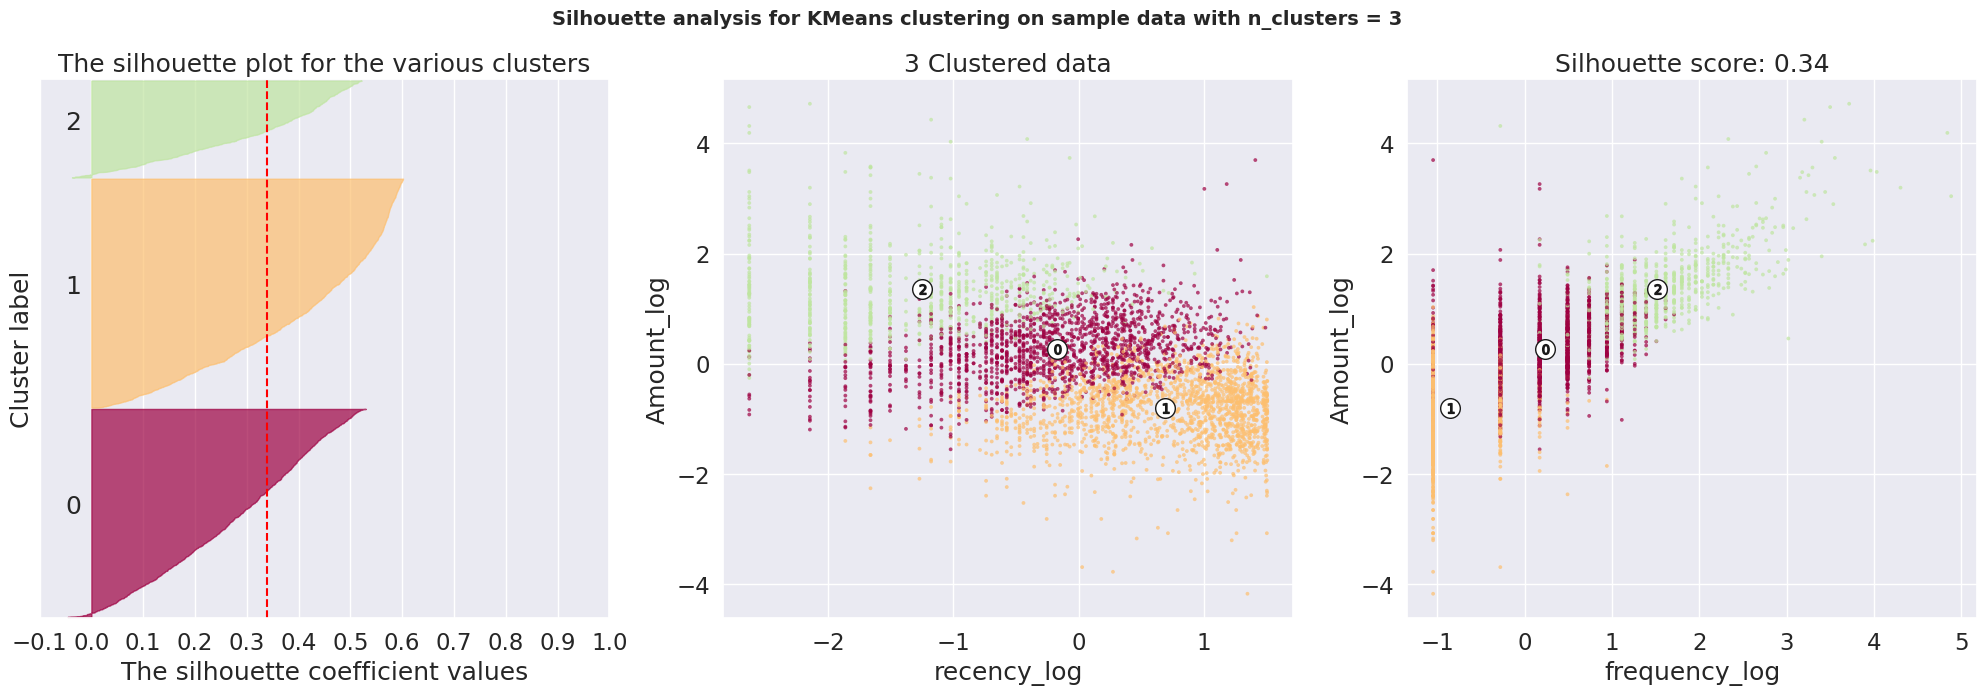

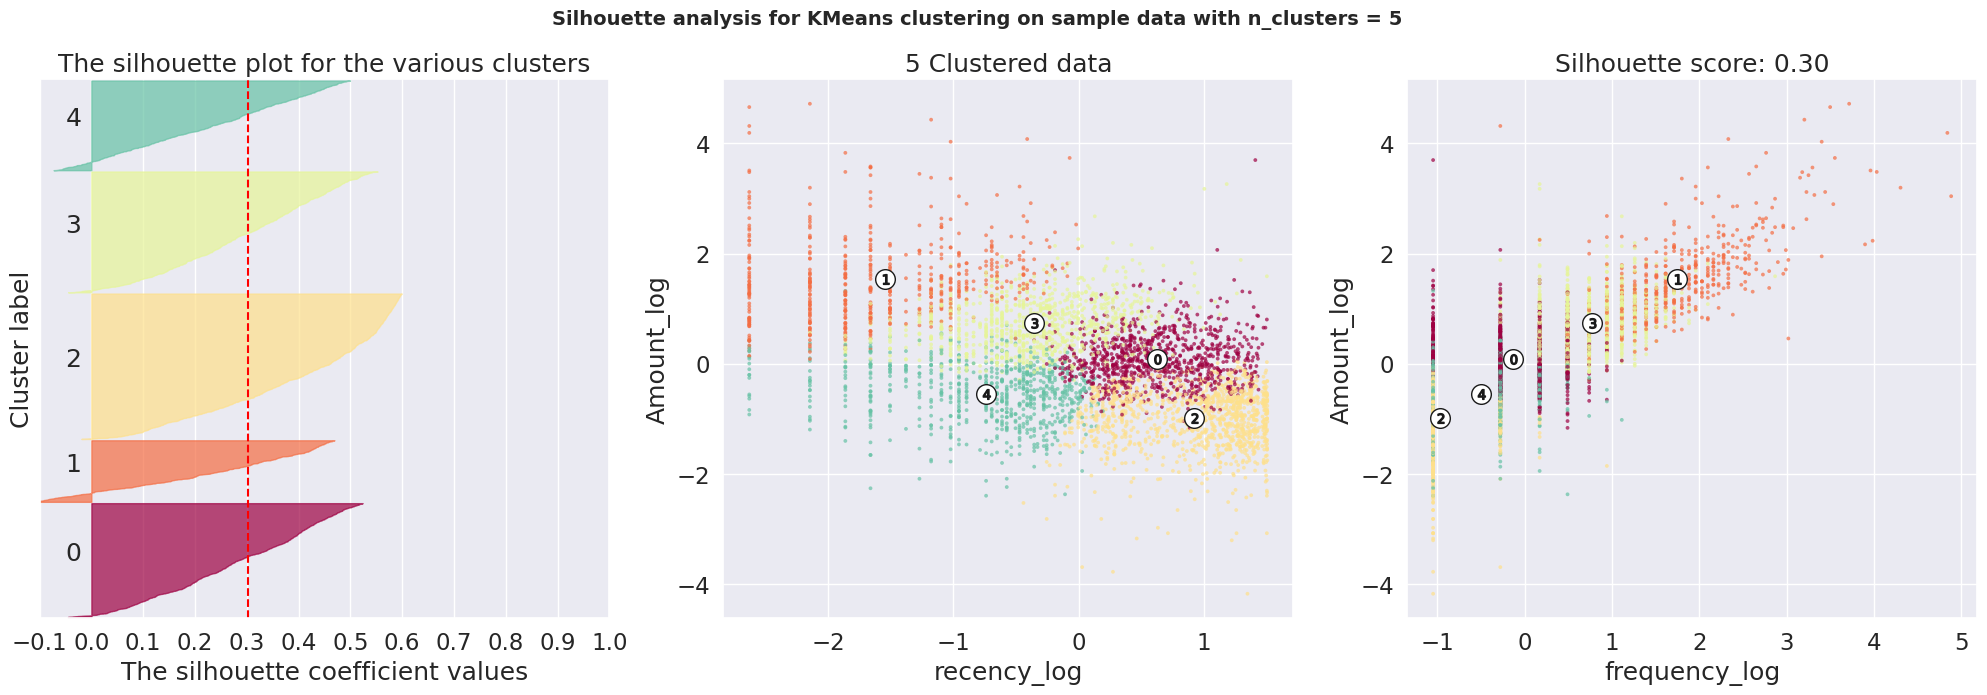

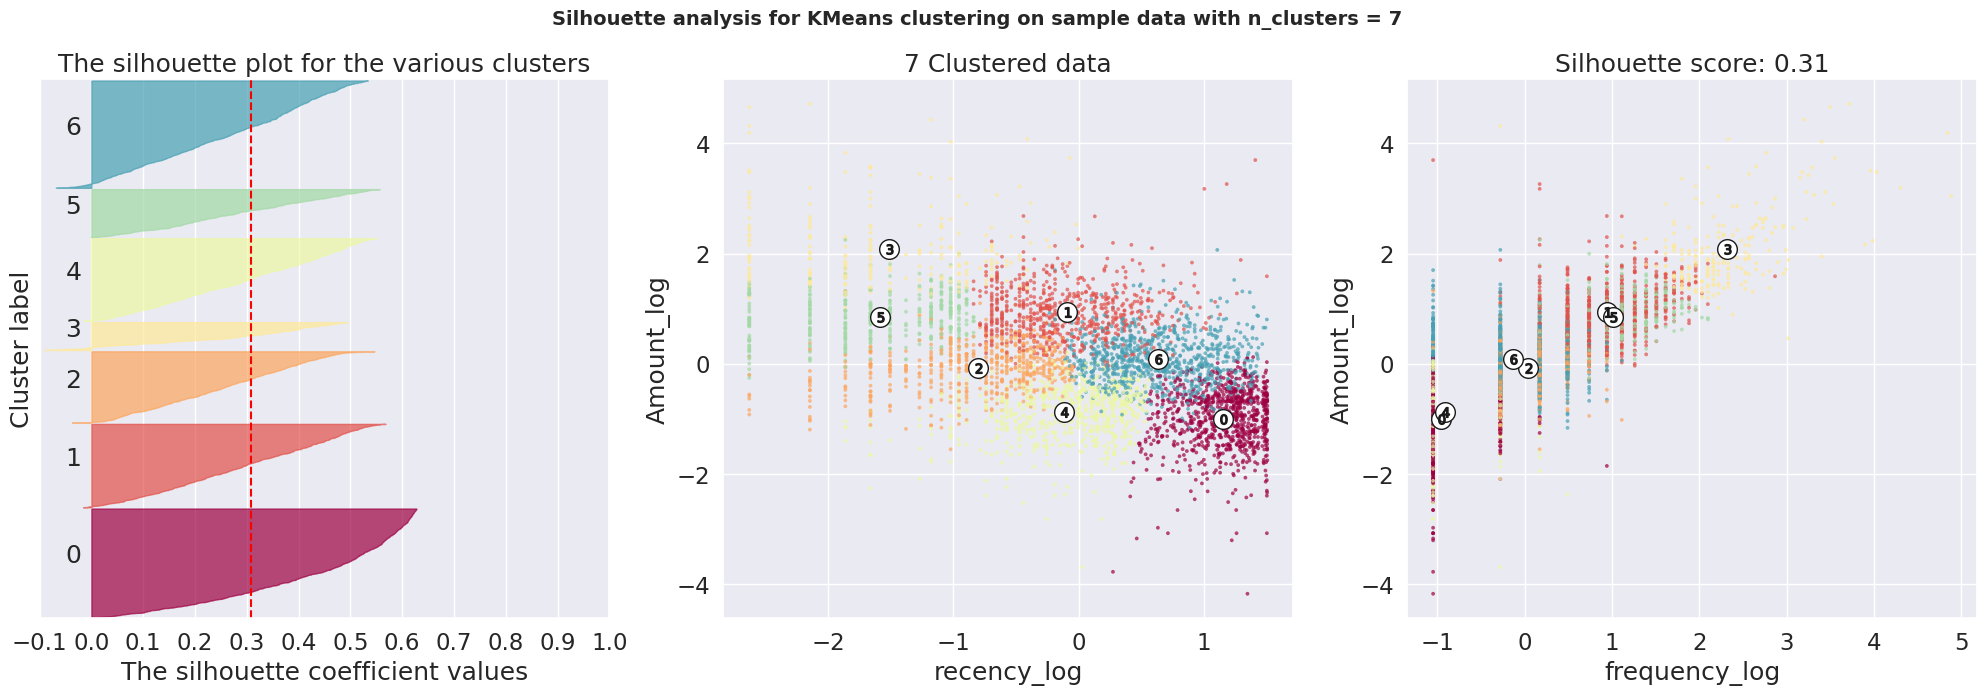

Optimal number of clusters based on Dunn Index: 3


In [ ]:
cluster_centers = dict()
dunn_indices = []
db_indices = []

for n_clusters in range(3,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    # Calculate Dunn Index
    cluster_distances = []
    for i in range(n_clusters):
        cluster_i_points = X_scaled[cluster_labels == i]
        pairwise_dist = pairwise_distances(cluster_i_points)
        within_cluster_dist = np.mean(pairwise_dist[np.triu_indices(len(pairwise_dist), k=1)])
        cluster_distances.append(within_cluster_dist)

    max_within_cluster_dist = max(cluster_distances)
    min_between_cluster_dist = min([np.linalg.norm(c1 - c2) for c1, c2 in combinations(clusterer.cluster_centers_, 2)])
    dunn_index = min_between_cluster_dist / max_within_cluster_dist

    dunn_indices.append(dunn_index)

    db_index = davies_bouldin_score(X_scaled, cluster_labels)
    db_indices.append(db_index)

    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)

    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
optimal_n_clusters = np.argmax(dunn_indices) * 2 + 3  # Add 3 to convert back to the original range (starting from 3)
print("Optimal number of clusters based on Dunn Index:", optimal_n_clusters)

In [ ]:
dunn_indices

[1.099347577336848, 0.8881619828110809, 0.8679032440553616]

In [ ]:
db_indices

[1.0436163376599186, 1.0479192668223825, 0.9820420542621723]

In [ ]:
features = ['Amount',  'recency',  'frequency']
for i in range(3,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.34
Centers of each cluster:
        Amount     recency  frequency
0  1019.114007   33.637514   3.171771
1   262.853859  115.772727   1.196009
2  3983.322212    7.173427  10.099071
--------------------------------------------------
for 5 clusters the silhouette score is 0.30
Centers of each cluster:
        Amount     recency  frequency
0   813.621211  105.524342   2.279822
1  5051.937209    4.728829  12.403678
2   208.013492  162.151056   1.075721
3  1830.850445   25.873099   5.126046
4   366.981282   15.050233   1.644625
--------------------------------------------------
for 7 clusters the silhouette score is 0.31
Centers of each cluster:
         Amount     recency  frequency
0    205.487848  225.646442   1.084052
1   2401.476039   37.751906   6.002805
2    657.936736   13.675696   2.647270
3  10143.118638    4.926439  20.646017
4    239.411000   36.717710   1.130641
5   2114.266897    4.458579   6.365225
6    814.574493  107.556965   2.277767

CustomerID  recency  frequency    Amount  recency_log  frequency_log  \
0       12346    326.0          1  77183.60     5.786897       0.000000   
1       12347      2.0          7   4310.00     0.693147       1.945910   
2       12348     75.0          4   1797.24     4.317488       1.386294   
3       12349     19.0          1   1757.55     2.944439       0.000000   
4       12350    310.0          1    334.40     5.736572       0.000000   

   Amount_log  clusters_3  clusters_5  clusters_7  
0   11.253942           0           0           1  
1    8.368693           2           1           5  
2    7.494007           0           3           1  
3    7.471676           0           4           2  
4    5.812338           1           2           0

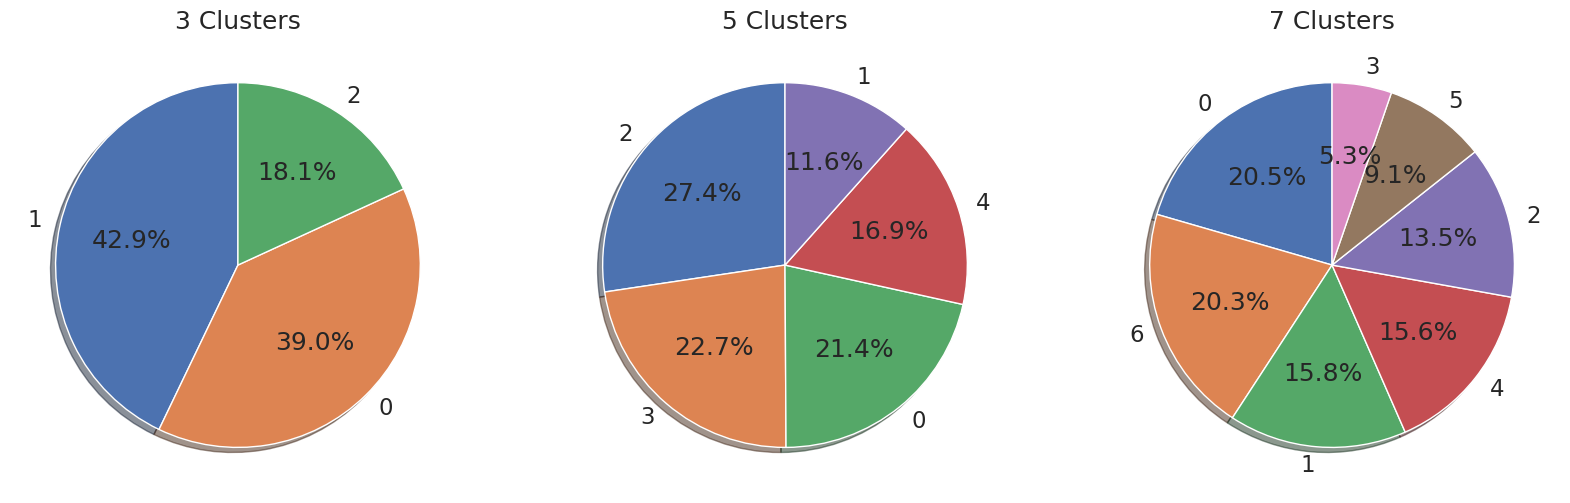

In [ ]:
customer_history_df['clusters_3'] = cluster_centers[3]['labels']
customer_history_df['clusters_5'] = cluster_centers[5]['labels']
customer_history_df['clusters_7'] = cluster_centers[7]['labels']
display(customer_history_df.head())

fig = plt.figure(figsize=(20,7))
f1 = fig.add_subplot(131)
market = customer_history_df.clusters_3.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('3 Clusters')
f1 = fig.add_subplot(132)
market = customer_history_df.clusters_5.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('5 Clusters')
f1 = fig.add_subplot(133)
market = customer_history_df.clusters_7.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('7 Clusters')
plt.show()

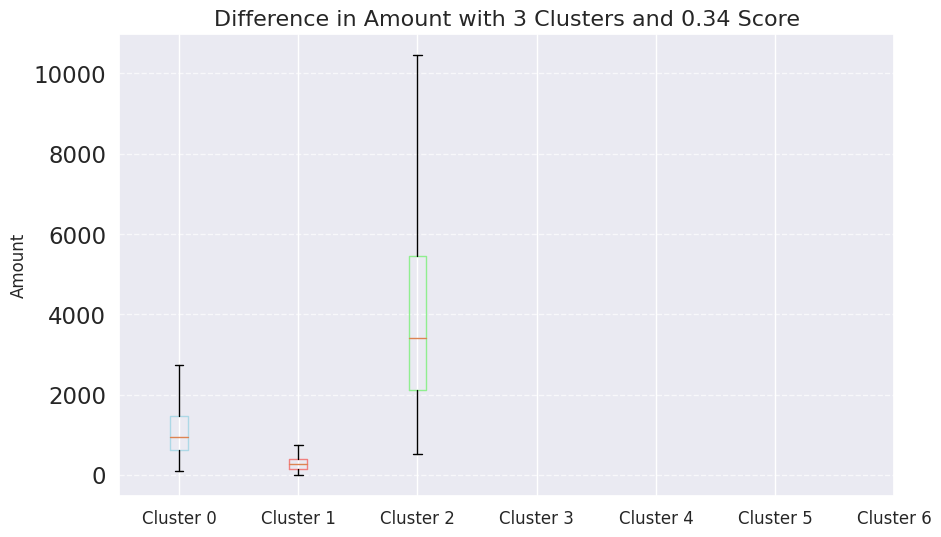

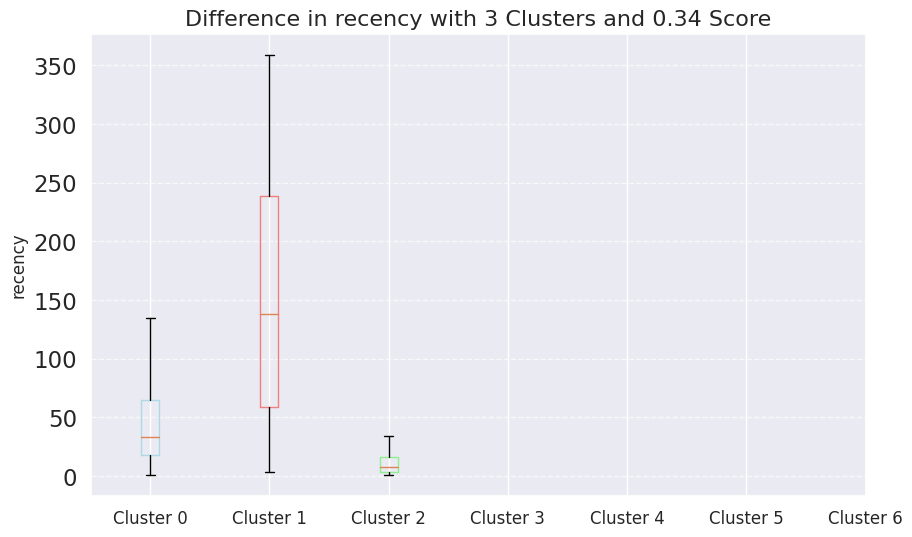

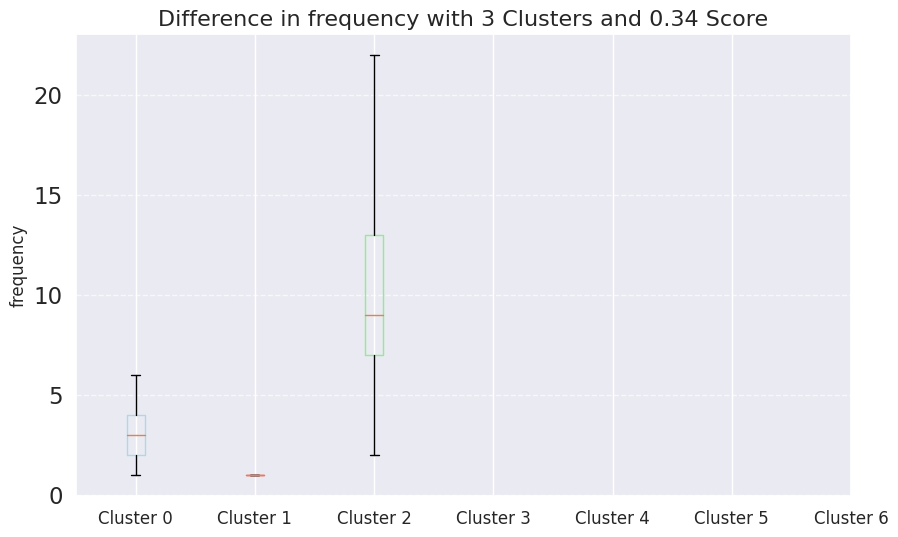

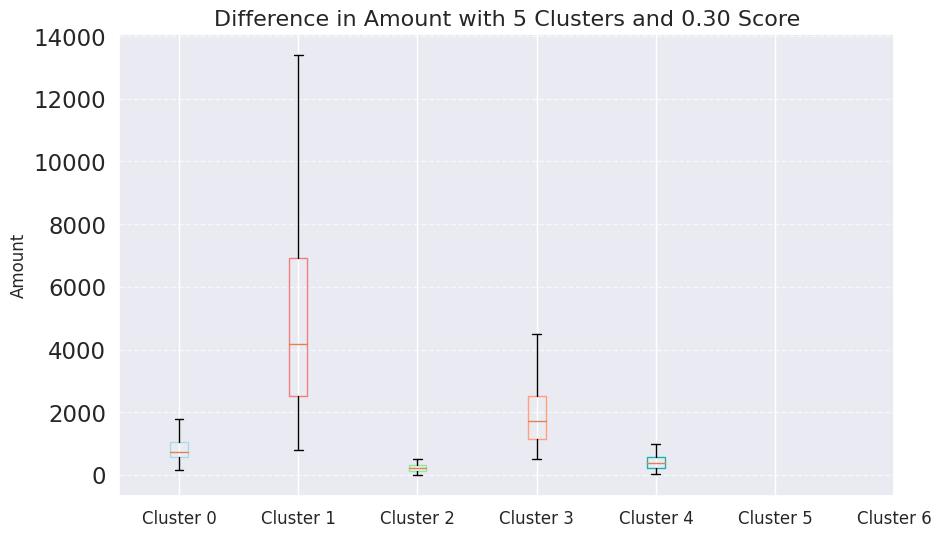

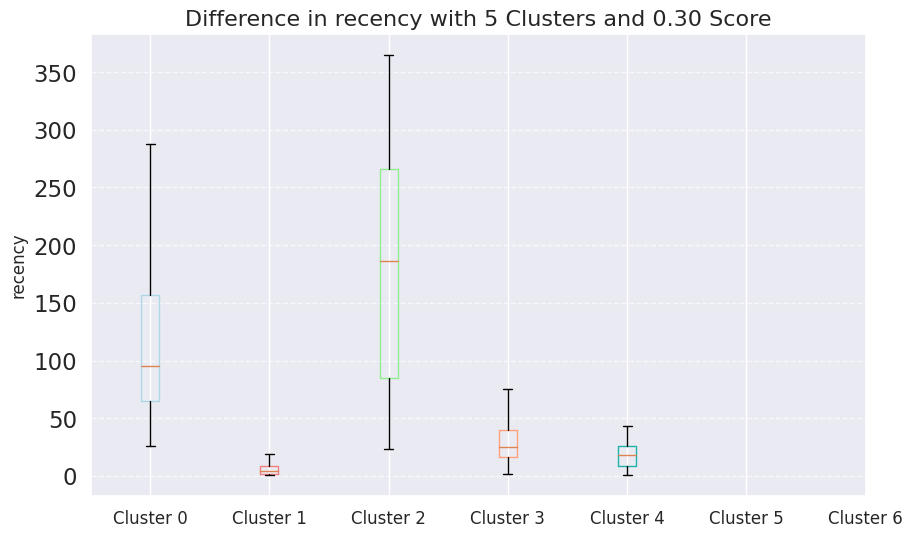

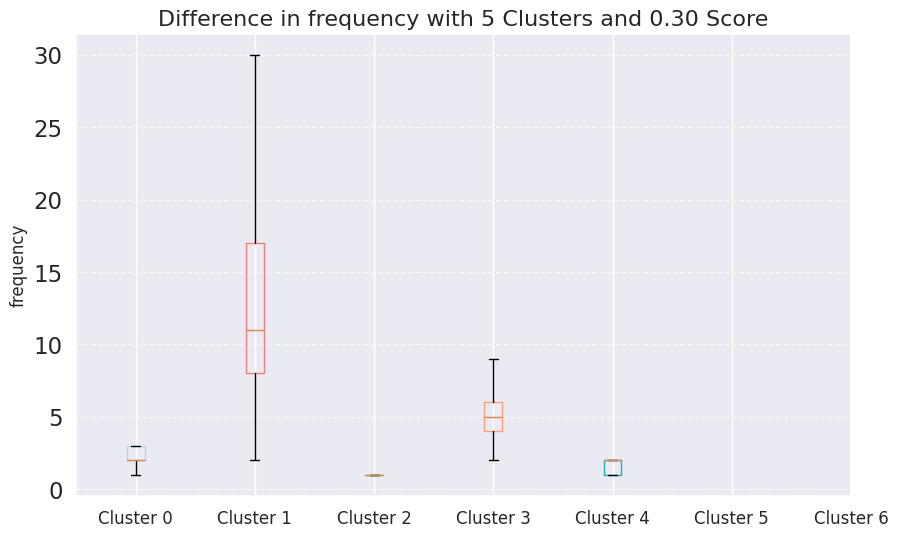

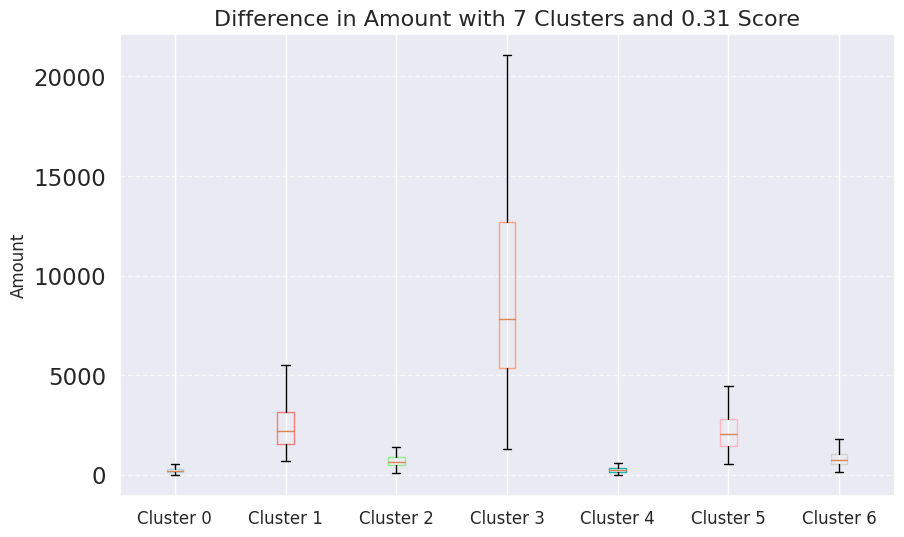

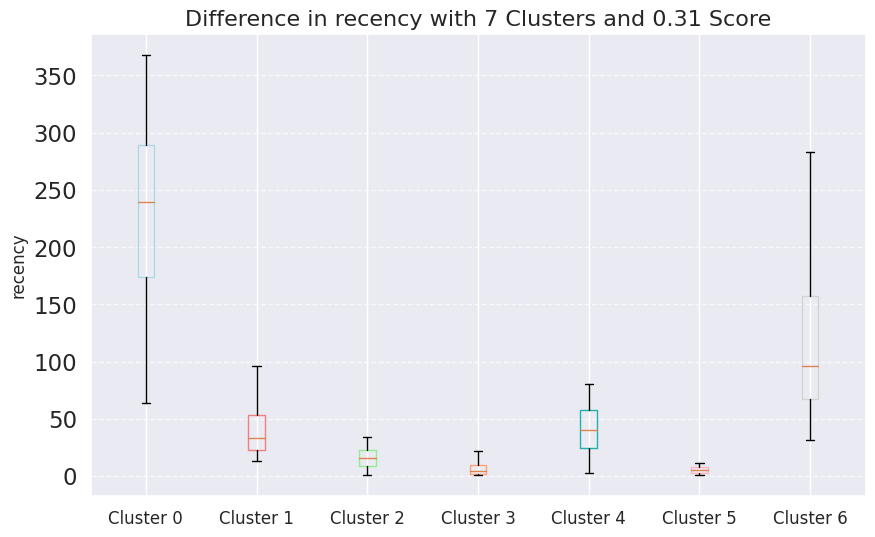

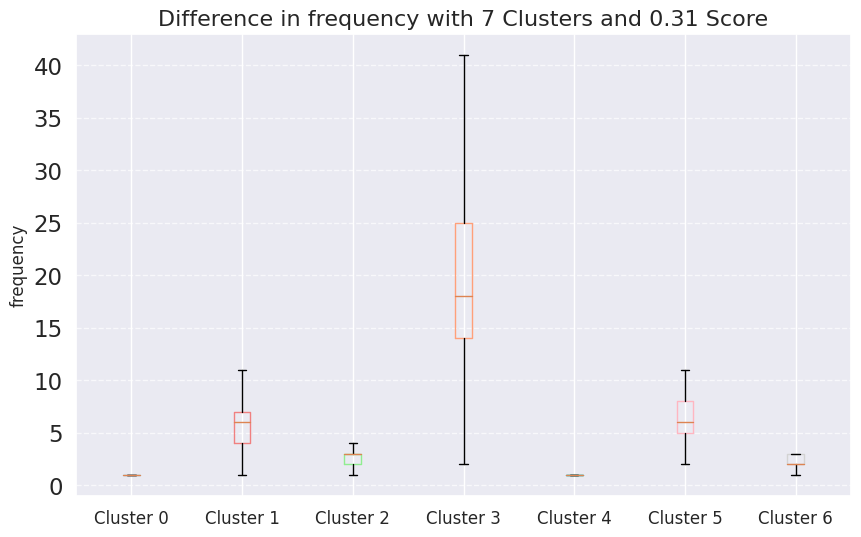

In [ ]:
import numpy as np

# Set custom figure size
fig_width = 10  # Width of the figure
fig_height = 6  # Height of the figure

x_data = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightgray']
cutoff_quantile = 95

for n_clusters in range(3, K_best + 1, 2):
    cl = 'clusters_' + str(n_clusters)
    for fild in range(0, 3):
        field_to_plot = features[fild]
        y_data = []
        ymax = 0
        for i in range(n_clusters):
            y0 = customer_history_df[customer_history_df[cl] == i][field_to_plot].values
            y0 = y0[y0 < np.percentile(y0, cutoff_quantile)]
            if len(y0) > 0 and ymax < max(y0):
                ymax = max(y0)
            y_data.append(y0)

        # Create the figure with custom figsize
        fig, ax = plt.subplots(figsize=(fig_width, fig_height))

        for xd, yd, cls in zip(x_data[:n_clusters], y_data, colors[:n_clusters]):
            ax.boxplot(yd, positions=[x_data.index(xd)], showfliers=False, boxprops={'color': cls})

        # Set custom font size for title and axis labels
        title_font_size = 16
        label_font_size = 12

        ax.set_title('Difference in {} with {} Clusters and {:1.2f} Score'. \
            format(field_to_plot, n_clusters, cluster_centers[n_clusters]['silhouette_score']), fontsize=title_font_size)
        ax.set_ylabel(field_to_plot, fontsize=label_font_size)
        ax.set_xticks(range(len(x_data)))
        ax.set_xticklabels(x_data, fontsize=label_font_size)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        plt.show()


# New section

In [ ]:
cs_df.dtypes

StockCode                           object
Description                         object
InvoiceNo                            int64
Quantity                             int64
InvoiceDate                 datetime64[ns]
UnitPrice                          float64
CustomerID                           int64
Country                             object
Amount                             float64
Internal                            object
days_since_last_purchase           float64
dtype: object

In [ ]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Convert the 'InvoiceNo' column to string, as Apriori expects transactions as strings or integers
cs_df['InvoiceNo'] = cs_df['InvoiceNo'].astype(str)

# Perform one-hot encoding for the Description column
basket = (cs_df.groupby(['InvoiceNo', 'Description'])['Description']
          .count().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert the count values to binary values (1 or 0) for Apriori algorithm
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Perform Apriori algorithm to find frequent itemsets with a minimum support of 0.2
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)

# Generate association rules with a minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Print the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
    support                              itemsets
0  0.106734  (WHITE HANGING HEART T-LIGHT HOLDER)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [ ]:
print('Check if we had negative quantity and prices at same register:',
     'No' if cs_df_copy[(cs_df_copy.Quantity<0) & (cs_df_copy.UnitPrice<0)].shape[0] == 0 else 'Yes', '\n')
print('Check how many register we have where quantity is negative',
      'and prices is 0 or vice-versa:',
      cs_df_copy[(cs_df_copy.Quantity<=0) & (cs_df_copy.UnitPrice<=0)].shape[0])
print('\nWhat is the customer ID of the registers above:',
      cs_df_copy.loc[(cs_df_copy.Quantity<=0) & (cs_df_copy.UnitPrice<=0),
                ['CustomerID']].CustomerID.unique())
print('\n% Negative Quantity: {:3.2%}'.format(cs_df_copy[(cs_df_copy.Quantity<0)].shape[0]/cs_df_copy.shape[0]))
print('\nAll register with negative quantity has Invoice start with:',
      cs_df_copy.loc[(cs_df_copy.Quantity<0) & ~(cs_df_copy.CustomerID.isnull()), 'InvoiceNo'].apply(lambda x: x[0]).unique())
print('\nSee an example of negative quantity and others related records:')
display(cs_df_copy[(cs_df_copy.CustomerID==12472) & (cs_df_copy.StockCode==22244)])
print('Check register with UnitPrice negative:')
display(cs_df_copy[(cs_df_copy.UnitPrice<0)])

Check if we had negative quantity and prices at same register: No 

Check how many register we have where quantity is negative and prices is 0 or vice-versa: 1336

What is the customer ID of the registers above: [nan]

% Negative Quantity: 1.96%

All register with negative quantity has Invoice start with: ['C']

See an example of negative quantity and others related records:


InvoiceNo StockCode                 Description  Quantity  \
1973     C536548     22244  3 HOOK HANGER MAGIC GARDEN        -4   
9438      537201     22244  3 HOOK HANGER MAGIC GARDEN        12   
121980    546843     22244  3 HOOK HANGER MAGIC GARDEN        12   

               InvoiceDate  UnitPrice  CustomerID  Country  
1973   2010-12-01 14:33:00       1.95     12472.0  Germany  
9438   2010-12-05 14:19:00       1.95     12472.0  Germany  
121980 2011-03-17 12:40:00       1.95     12472.0  Germany

Check register with UnitPrice negative:


InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [ ]:
cs_df_copy = cs_df_copy[~cs_df_copy['Description'].isnull()]

In [ ]:
cat_des_df = cs_df_copy.groupby(["StockCode","Description"]).count().reset_index()
display(cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].reset_index().head())
cs_df_copy[cs_df_copy['StockCode'] == cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1]
      .reset_index()['index'][4]]['Description'].unique()

index  StockCode
0  20713          8
1  23084          7
2  21830          6
3  85175          6
4  85172          5

array(['HYACINTH BULB T-LIGHT CANDLES', 'Dotcom set',
       'wrongly sold as sets', '?sold as sets?', 'check'], dtype=object)

In [ ]:
items = list(cs_df_copy.Description.unique())
grouped = cs_df_copy.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)

In [ ]:

def prune_dataset(input_df, length_trans = 2, total_sales_perc = 0.5,
                  start_item = None, end_item = None, TopCols = None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    item_count = input_df.sum().sort_values(ascending = False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending = False))
    item_count.rename(columns={item_count.columns[0]:'item_name',
                               item_count.columns[1]:'item_count'}, inplace=True)
    if TopCols:
        input_df['total_items'] = input_df[TopCols].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[TopCols], item_count[item_count.item_name.isin(TopCols)]
    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items],item_count[start_item:end_item]
    else:
        item_count['item_perc'] = item_count['item_count']/total_items
        item_count['total_perc'] = item_count.item_perc.cumsum()
        selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc]

In [ ]:
cs_df_copy['Amount'] = cs_df_copy.Quantity*cs_df_copy.UnitPrice

In [ ]:
AmountSum = cs_df_copy.groupby(["Description"]).Amount.sum().sort_values(ascending = False)
inv = cs_df_copy[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)
Top15ev = list(inv[:15].index)

In [ ]:
output_df, item_counts = prune_dataset(input_df=transaction_df, length_trans=2,start_item = 0, end_item = 15)
print('Total of Sales Amount by the Top 15 Products in Sales Events (Invoice): {:.2f}'.format(AmountSum[Top15ev].sum()))
print('Number of Sales Events:', output_df.shape[0])
print('Number of Products:', output_df.shape[1])

item_counts

Total of Sales Amount by the Top 15 Products in Sales Events (Invoice): 863668.27
Number of Sales Events: 5478
Number of Products: 15


item_name  item_count
0   WHITE HANGING HEART T-LIGHT HOLDER        2302
1             REGENCY CAKESTAND 3 TIER        2169
2              JUMBO BAG RED RETROSPOT        2135
3                        PARTY BUNTING        1706
4              LUNCH BAG RED RETROSPOT        1607
5        ASSORTED COLOUR BIRD ORNAMENT        1467
6    SET OF 3 CAKE TINS PANTRY DESIGN         1458
7      PACK OF 72 RETROSPOT CAKE CASES        1334
8              LUNCH BAG  BLACK SKULL.        1295
9      NATURAL SLATE HEART CHALKBOARD         1266
10                             POSTAGE        1250
11             JUMBO BAG PINK POLKADOT        1231
12            JAM MAKING SET WITH JARS        1220
13               HEART OF WICKER SMALL        1212
14              JUMBO STORAGE BAG SUKI        1201

In [ ]:
output_df

WHITE HANGING HEART T-LIGHT HOLDER  REGENCY CAKESTAND 3 TIER  \
13                                      0                         0   
17                                      0                         0   
23                                      1                         0   
27                                      0                         0   
33                                      1                         0   
...                                   ...                       ...   
24193                                   0                         1   
24239                                   0                         0   
24251                                   0                         1   
24327                                   0                         0   
24413                                   0                         0   

       JUMBO BAG RED RETROSPOT  PARTY BUNTING  LUNCH BAG RED RETROSPOT  \
13                           0              0                        1   
17                           0              0                        0   
23                           1              0                        0   
27                           0              0                        0   
33                           0              0                        1   
...                        ...            ...                      ...   
24193                        0              0                        0   
24239                        0              1                        0   
24251                        0              0                        0   
24327                        1              0                        0   
24413                        1              0                        0   

       ASSORTED COLOUR BIRD ORNAMENT  SET OF 3 CAKE TINS PANTRY DESIGN   \
13                                 0                                  0   
17                                 0                                  0   
23                                 0                                  0   
27                                 1                                  0   
33                                 0                                  0   
...                              ...                                ...   
24193                              0                                  1   
24239                              0                                  0   
24251                              0                                  0   
24327                              0                                  0   
24413                              0                                  0   

       PACK OF 72 RETROSPOT CAKE CASES  LUNCH BAG  BLACK SKULL.  \
13                                   1                        0   
17                                   0                        0   
23                                   0                        0   
27                                   1                        0   
33                                   0                        0   
...                                ...                      ...   
24193                                0                        0   
24239                                0                        0   
24251                                0                        0   
24327                                0                        1   
24413                                0                        0   

       NATURAL SLATE HEART CHALKBOARD   POSTAGE  JUMBO BAG PINK POLKADOT  \
13                                   0        0                        1   
17                                   1        0                        0   
23                                   0        0                        0   
27                                   0        0                        0   
33                                   0        0                        0   
...                                ...      ...                      ...   
24193                      

In [ ]:
frequent_itemsets = apriori(output_df, min_support=0.01, use_colnames=True)

# Generate association rules with a minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Print the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
      support                                           itemsets
0    0.288609               (WHITE HANGING HEART T-LIGHT HOLDER)
1    0.251734                         (REGENCY CAKESTAND 3 TIER)
2    0.330595                          (JUMBO BAG RED RETROSPOT)
3    0.228733                                    (PARTY BUNTING)
4    0.254655                          (LUNCH BAG RED RETROSPOT)
..        ...                                                ...
456  0.010223  (LUNCH BAG RED RETROSPOT, NATURAL SLATE HEART ...
457  0.015152  (LUNCH BAG RED RETROSPOT, JUMBO BAG PINK POLKA...
458  0.010953  (HEART OF WICKER SMALL, JAM MAKING SET WITH JA...
459  0.011501  (PARTY BUNTING, REGENCY CAKESTAND 3 TIER, PACK...
460  0.012961  (LUNCH BAG RED RETROSPOT, JUMBO STORAGE BAG SU...

[461 rows x 2 columns]

Association Rules:
                                           antecedents  \
0                            (JUMBO BAG PINK POLKADOT)   
1                             (JUMBO STOR

In [ ]:
rules.antecedents.value_counts()

(REGENCY CAKESTAND 3 TIER, NATURAL SLATE HEART CHALKBOARD , JAM MAKING SET WITH JARS)                  5
(LUNCH BAG RED RETROSPOT, NATURAL SLATE HEART CHALKBOARD , JAM MAKING SET WITH JARS)                   4
(REGENCY CAKESTAND 3 TIER, NATURAL SLATE HEART CHALKBOARD , JUMBO BAG RED RETROSPOT)                   4
(JAM MAKING SET WITH JARS, LUNCH BAG RED RETROSPOT, WHITE HANGING HEART T-LIGHT HOLDER)                3
(JAM MAKING SET WITH JARS, LUNCH BAG RED RETROSPOT, REGENCY CAKESTAND 3 TIER)                          3
                                                                                                      ..
(LUNCH BAG RED RETROSPOT, JUMBO BAG PINK POLKADOT, WHITE HANGING HEART T-LIGHT HOLDER)                 1
(LUNCH BAG RED RETROSPOT, NATURAL SLATE HEART CHALKBOARD , WHITE HANGING HEART T-LIGHT HOLDER)         1
(JUMBO BAG RED RETROSPOT, LUNCH BAG  BLACK SKULL., WHITE HANGING HEART T-LIGHT HOLDER)                 1
(LUNCH BAG RED RETROSPOT, PACK OF 72 RETROSPOT CAKE CAS

In [ ]:
frequent_itemsets

support                                           itemsets
0    0.288609               (WHITE HANGING HEART T-LIGHT HOLDER)
1    0.251734                         (REGENCY CAKESTAND 3 TIER)
2    0.330595                          (JUMBO BAG RED RETROSPOT)
3    0.228733                                    (PARTY BUNTING)
4    0.254655                          (LUNCH BAG RED RETROSPOT)
..        ...                                                ...
456  0.010223  (LUNCH BAG RED RETROSPOT, NATURAL SLATE HEART ...
457  0.015152  (LUNCH BAG RED RETROSPOT, JUMBO BAG PINK POLKA...
458  0.010953  (HEART OF WICKER SMALL, JAM MAKING SET WITH JA...
459  0.011501  (PARTY BUNTING, REGENCY CAKESTAND 3 TIER, PACK...
460  0.012961  (LUNCH BAG RED RETROSPOT, JUMBO STORAGE BAG SU...

[461 rows x 2 columns]

In [ ]:
rules.sort_values(by="confidence",ascending=False)

antecedents  \
147  (JAM MAKING SET WITH JARS, JUMBO STORAGE BAG S...   
162  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...   
138  (PACK OF 72 RETROSPOT CAKE CASES, JUMBO STORAG...   
62   (JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKAD...   
129  (LUNCH BAG RED RETROSPOT, JUMBO STORAGE BAG SU...   
..                                                 ...   
133  (JUMBO BAG RED RETROSPOT, SET OF 3 CAKE TINS P...   
2                            (LUNCH BAG  BLACK SKULL.)   
131  (NATURAL SLATE HEART CHALKBOARD , JUMBO BAG RE...   
36   (PARTY BUNTING, NATURAL SLATE HEART CHALKBOARD...   
110  (JAM MAKING SET WITH JARS, NATURAL SLATE HEART...   

                              consequents  antecedent support  \
147             (JUMBO BAG RED RETROSPOT)            0.012778   
162             (JUMBO BAG RED RETROSPOT)            0.015152   
138             (JUMBO BAG RED RETROSPOT)            0.014604   
62              (JUMBO BAG RED RETROSPOT)            0.025557   
129             (JUMBO BAG RED RETROSPOT)            0.028478   
..                                    ...                 ...   
133              (JUMBO STORAGE BAG SUKI)            0.023366   
2               (LUNCH BAG RED RETROSPOT)            0.196970   
131            (JAM MAKING SET WITH JARS)            0.020080   
36   (WHITE HANGING HEART T-LIGHT HOLDER)            0.020080   
110            (REGENCY CAKESTAND 3 TIER)            0.019168   

     consequent support   support  confidence      lift  leverage  conviction  \
147            0.330595  0.011135    0.871429  2.635939  0.006911    5.206482   
162            0.330595  0.012961    0.855422  2.587521  0.007952    4.630051   
138            0.330595  0.012413    0.850000  2.571121  0.007585    4.462699   
62             0.330595  0.021358    0.835714  2.527909  0.012909    4.074638   
129            0.330595  0.023731    0.833333  2.520707  0.014317    4.016429   
..                  ...       ...         ...       ...       ...         ...   
133            0.198613  0.014056    0.601562  3.028823  0.009415    2.011325   
2              0.254655  0.118291    0.600556  2.358313  0.068132    1.865957   
131            0.167032  0.012048    0.600000  3.592131  0.008694    2.082421   
36             0.288609  0.012048    0.600000  2.078937  0.006253    1.778478   
110            0.251734  0.011501    0.600000  2.383466  0.006675    1.870664   

     zhangs_metric  
147       0.628662  
162       0.622969  
138       0.620121  
62        0.620268  
129       0.620970  
..             ...  
133       0.685865  
2         0.717243  
131       0.736401  
36        0.529620  
110       0.591786  

[164 rows x 10 columns]

In [ ]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')

In [ ]:
customer_history_df

CustomerID  recency  frequency    Amount  recency_log  frequency_log  \
0          12346    326.0          1  77183.60     5.786897       0.000000   
1          12347      2.0          7   4310.00     0.693147       1.945910   
2          12348     75.0          4   1797.24     4.317488       1.386294   
3          12349     19.0          1   1757.55     2.944439       0.000000   
4          12350    310.0          1    334.40     5.736572       0.000000   
...          ...      ...        ...       ...          ...            ...   
4333       18280    278.0          1    180.60     5.627621       0.000000   
4334       18281    181.0          1     80.82     5.198497       0.000000   
4335       18282      8.0          2    178.05     2.079442       0.693147   
4336       18283      4.0         16   2094.88     1.386294       2.772589   
4337       18287     43.0          3   1837.28     3.761200       1.098612   

      Amount_log  clusters_3  clusters_5  clusters_7  
0      11.253942           0           0           1  
1       8.368693           2           1           5  
2       7.494007           0           3           1  
3       7.471676           0           4           2  
4       5.812338           1           2           0  
...          ...         ...         ...         ...  
4333    5.196285           1           2           0  
4334    4.392224           1           2           0  
4335    5.182064           0           4           2  
4336    7.647252           2           1           5  
4337    7.516041           0           3           1  

[4338 rows x 10 columns]